

Библиотека для работы с графами [NetworkX](https://networkx.org/documentation/stable/)

In [ ]:
# Импортируем библиотеку для работы с графами и не только
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import linalg as LA
import itertools
import math
import datetime
import community
import random


# **1 задание **
Wikipedia vote network.[Текст ссылки](https://)


In [ ]:
# для импорта датасетов из папки на Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Wiki_Vote = pd.read_table('/content/drive/MyDrive/data/Wiki_Vote.txt', sep='\t', names=['from', 'to'])
print(Wiki_Vote)

        from    to
0         30  1412
1         30  3352
2         30  5254
3         30  5543
4         30  7478
...      ...   ...
103684  8272  4940
103685  8273  4940
103686  8150  8275
103687  8150  8276
103688  8274  8275

[103689 rows x 2 columns]


In [ ]:

G = nx.DiGraph()
with open("/content/drive/MyDrive/data/Wiki_Vote.txt", "r") as file:
    for line in file:
        nodes = line.strip().split() #по пробелу
        if len(nodes) == 2: # проверяем, что есть 2 столбца
            node1, node2 = nodes
            G.add_edge(node1, node2)
        else:
            print("Некорректная строка:", line)



Некорректная строка: 



In [ ]:
G_N = G.number_of_nodes()
G_L = G.number_of_edges()

print(f'Число узлов: {G_N}', f'Число ребер: {G_L}')

Число узлов: 7115 Число ребер: 103689


https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.cycles.find_cycle.html цикл поиска петель

In [ ]:
cycles = nx.find_cycle(G, orientation='original')
for cycle in cycles:
    print(cycle)


('3', '28', 'forward')
('28', '3', 'forward')


https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.number_of_selfloops.html

In [ ]:
num_selfloops = nx.number_of_selfloops(G)
print( num_selfloops)

0


https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.components.weakly_connected_components.html

In [ ]:
# Подсчет числа компонент слабой связности
weak_components = list(nx.weakly_connected_components(G))
num_components = len(weak_components)

print( num_components)


24


https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.components.strongly_connected_components.html

In [ ]:
strong_components = list(nx.strongly_connected_components(G))
num_strong_components = len(strong_components)
print('Число компонент сильной связности:', num_strong_components)

Число компонент сильной связности: 5816


In [ ]:
num_vertices = G.number_of_nodes()
fraction = len(weak_components) / num_vertices
print( fraction)

0.0033731553056921995


In [ ]:
# Подсчет доли вершин в наибольшей компоненте
fraction = num_strong_components / num_vertices
print('Доля вершин в наибольшей компоненте сильной связности:', fraction)

Доля вершин в наибольшей компоненте сильной связности: 0.8174279690794097


2

In [ ]:
# Подсчет числа узлов без входящих реберfor _ используется для игнорирования значения узла
num_nodes_without_incoming_edges = sum(in_degree == 0 for _, in_degree in G.in_degree())

# Подсчет числа узлов без исходящих ребер
num_nodes_without_outgoing_edges = sum(out_degree == 0 for _, out_degree in G.out_degree())

print('Количество узлов без входящих ребер:', num_nodes_without_incoming_edges)
print('Количество узлов без исходящих ребер:', num_nodes_without_outgoing_edges)

Количество узлов без входящих ребер: 4734
Количество узлов без исходящих ребер: 1005


3

In [ ]:
count_degout_gt_15 = 0

# Перебор всех узлов в графе
for node in G.nodes():
    # Проверка условия degout > 15 для каждого узла
    if G.out_degree(node) > 15:
        count_degout_gt_15 += 1 #уведичиваем счетчик

# Вывод числа узлов с degout > 15
print("Число узлов с degout > 15:", count_degout_gt_15)

Число узлов с degout > 15: 1295


In [ ]:

count_degin_lt_15 = 0

# Перебор всех узлов в графе
for node in G.nodes():
    # Проверка условия degin < 15 для каждого узла
    if G.in_degree(node) < 15:
        count_degin_lt_15 += 1#прибавить к текущему значению

# Вывод числа узлов с degin < 15
print("Число узлов с degin < 15:", count_degin_lt_15)

Число узлов с degin < 15: 5376


4

In [ ]:
# Вычисление средней степени исхода
degout_avg = sum(degree for node, degree in G.out_degree()) / len(G)

# Подсчет числа вершин с degout > degout_avg
count = sum(1 for node in G.nodes() if G.out_degree(node) > degout_avg)

print("Число вершин с degout > degout_avg:", count)

Число вершин с degout > degout_avg: 1352


5

In [ ]:
G_or = nx.Graph()
Wiki_Vote = pd.read_table('/content/drive/MyDrive/data/Wiki_Vote.txt', sep='\t', names=['from', 'to'])
print(Wiki_Vote)
with open("/content/drive/MyDrive/data/Wiki_Vote.txt", "r") as file:
    for line in file:
        nodes = line.strip().split() #по пробелу
        if len(nodes) == 2: # проверяем, что есть 4 столбца
            node1, node2 = nodes[0], nodes[1] #присваиваем значения переменным

            G_or.add_edge(node1, node2)
        else:
            print("Некорректная строка:", line)


        from    to
0         30  1412
1         30  3352
2         30  5254
3         30  5543
4         30  7478
...      ...   ...
103684  8272  4940
103685  8273  4940
103686  8150  8275
103687  8150  8276
103688  8274  8275

[103689 rows x 2 columns]
Некорректная строка: 



In [ ]:
largest_component = max(nx.connected_components(G_or), key=len)
Grrr = G_or.subgraph(largest_component)
# Находим радиус подграфа
radius = nx.radius(Grrr)
# Находим диаметр подграфа
diameter = nx.diameter(Grrr)
print("Радиус", radius)
print(" Диаметр:", diameter)

Радиус 4
 Диаметр: 7


In [ ]:
shortest_paths = dict(nx.all_pairs_shortest_path_length(Grrr)) #кратчайшие пути между парами вершин


distances = []
for node1 in shortest_paths: #для каждой node в shortest_paths
    for node2 in shortest_paths[node1]: # для каждой node 2 в shortest_paths(список от каждого узла до node 1)
        if node1 != node2: #не
            distances.append(shortest_paths[node1][node2])# в конец списка

# Сортировка списка расстояний по возрастанию
distances.sort()

# Вычисление 90-го процентиля
percentile_90 = np.percentile(distances, 90)

print("90-й процентиль расстояния:", percentile_90)


90-й процентиль расстояния: 4.0


Снежный ком был взят из кода предыдущих лет и преобразован в связи с подребностями текущего года

In [ ]:
def snowballsampling(G_or, maxsize):
    nodes = list(G_or.nodes())
    subgraph = set()
    seed = random.choice(nodes)
    subgraph.add(seed)

    while len(subgraph) < maxsize:
        current_node = random.choice(list(subgraph))
        neighbors = set(G_or.neighbors(current_node))
        new_nodes = neighbors - subgraph
        if len(new_nodes) == 0:
            break
        subgraph.update(new_nodes)

    return subgraph

snowww = snowballsampling(G_or, maxsize=500)
print("Снежный ком данные:", snowww)

diameter = nx.diameter(G_or.subgraph(snowww))
radius = nx.radius(G_or.subgraph(snowww))

print("Диаметр:", diameter)
print("Радиус:", radius)

Снежный ком данные: {'334', '2485', '4766', '3028', '4551', '3519', '3366', '1729', '2790', '4384', '3408', '1166', '893', '825', '5204', '3417', '3591', '2354', '4224', '4051', '1550', '4043', '4179', '2871', '4234', '4104', '4547', '2822', '2713', '2368', '3457', '3260', '2595', '1127', '3026', '53', '3667', '2967', '68', '432', '127', '228', '2972', '15', '1113', '2691', '3796', '922', '626', '3453', '2145', '4365', '3010', '3724', '3892', '4099', '3516', '2144', '521', '3009', '1185', '47', '3114', '5467', '3057', '3024', '3970', '4263', '5804', '5817', '1927', '285', '4256', '3645', '4613', '2535', '2290', '2785', '2041', '3814', '139', '5457', '2688', '3614', '4389', '3106', '3456', '356', '4024', '5341', '2706', '2506', '1186', '4037', '203', '3092', '2289', '806', '4443', '3665', '8293', '257', '35', '1151', '2135', '5162', '3937', '3641', '4483', '1307', '3662', '1330', '3808', '3007', '5233', '1385', '895', '4212', '2775', '3910', '2674', '3346', '4746', '3634', '3969', '1808

In [ ]:
# Нахождение числа треугольников в сети
triangles = nx.triangles(G_or)
num_triangles = sum(triangles.values()) // 3
print("Число треугольников в сети:", num_triangles)

# Вычисление среднего кластерного коэффициента
avg_clustering = nx.average_clustering(G_or)
print("Средний кластерный коэффициент:", avg_clustering)

# Вычисление глобального кластерного коэффициента
global_clustering = nx.transitivity(G_or)
print("Глобальный кластерный коэффициент:", global_clustering)

Число треугольников в сети: 608389
Средний кластерный коэффициент: 0.14089784589308738
Глобальный кластерный коэффициент: 0.12547914899233995


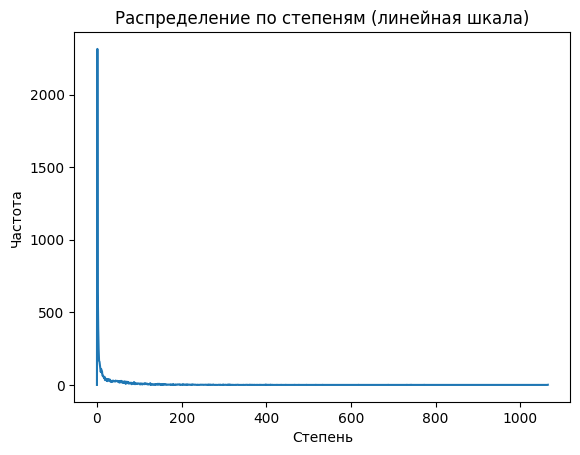

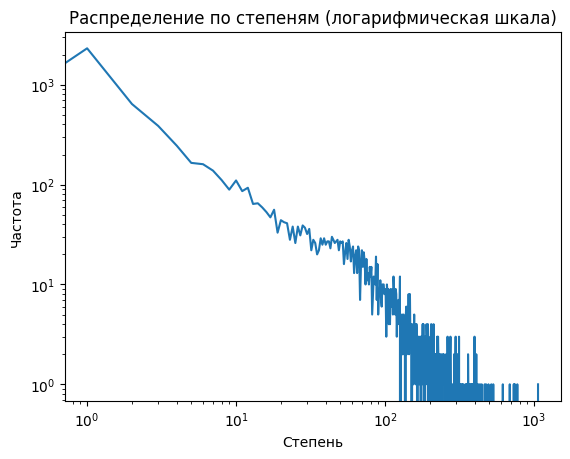

Минимальная степень: 1
Максимальная степень: 1065
Средняя степень: 28.32382290934645


In [ ]:

degree_hist = nx.degree_histogram(G_or)#гистограмма степеней вершин

plt.plot(degree_hist)
plt.xlabel('Степень')
plt.ylabel('Частота')
plt.title('Распределение по степеням (линейная шкала)')
plt.show()

plt.loglog(degree_hist)
plt.xlabel('Степень')
plt.ylabel('Частота')
plt.title('Распределение по степеням (логарифмическая шкала)')
plt.show()

min_degree = min(G_or.degree(), key=lambda x: x[1])[1]
max_degree = max(G_or.degree(), key=lambda x: x[1])[1]
avg_degree = sum(dict(G_or.degree()).values()) / len(G_or)

print("Минимальная степень:", min_degree)
print("Максимальная степень:", max_degree)
print("Средняя степень:", avg_degree)

<ipython-input-10-2394090a226a>:3: RuntimeWarning: divide by zero encountered in log
  y = np.log(degree_hist)


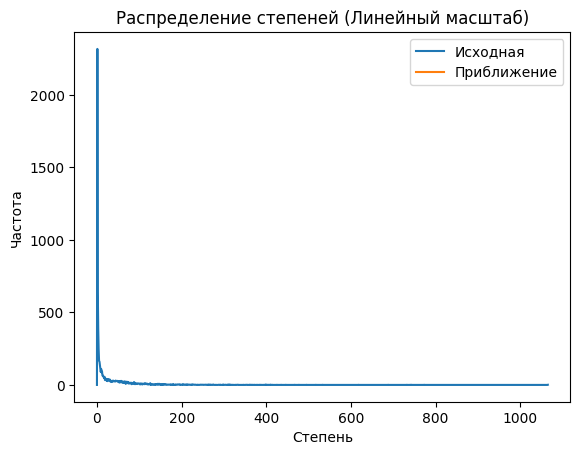

In [ ]:

# Подгонка линейной функции к логарифмической гистограмме степеней
x = np.log(np.arange(1, len(degree_hist)+1))#равномерно распрелеляем значения
y = np.log(degree_hist)#вычисляем логарифм от значений гистограммы вершины
coeffs = np.polyfit(x, y, deg=1)
m, b = coeffs[0], coeffs[1]

# Построение исходной гистограммы степеней и ее приближения в линейном масштабе
plt.plot(degree_hist, label='Исходная')
plt.plot(np.exp(b) * (np.arange(1, len(degree_hist)+1) ** m), label='Приближение')
plt.xlabel('Степень')
plt.ylabel('Частота')
plt.title('Распределение степеней (Линейный масштаб)')
plt.legend()
plt.show()

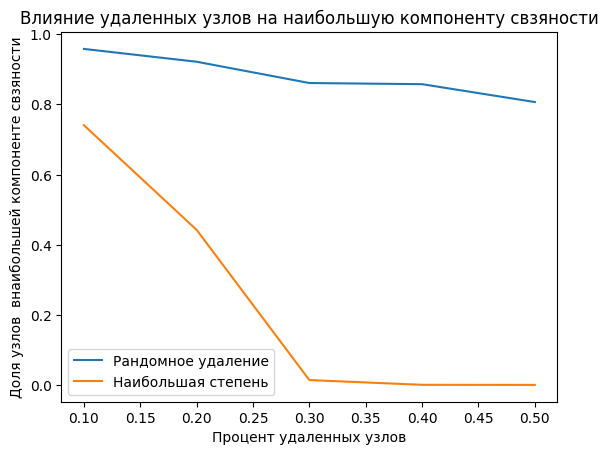

In [ ]:
def delete_random_nodes(G, percent):
    nodes_to_delete = np.random.choice(G.nodes(), size=int(len(G) * percent), replace=False)#выбираем рандомно узлы и удаляем узлы
    G_delete = G.copy()
    G_delete.remove_nodes_from(nodes_to_remove)#удаляеем узлы
    max_comp = max(nx.connected_components( G_delete), key=len)
    return len(max_comp ) / len( G_delete)

def delete_highest_degree_nodes(G, percent):
    dict_with_degree = dict(G.degree())#создаем словарь со степенями
    sorted_degrees = sorted( dict_with_degree.items(), key=lambda x: x[1], reverse=True)#сортируем в порядке убывания
    nodes_to_remove = [node for node, _ in sorted_degrees[:int(len(G) * percent)]]#создае список с самой маленькой степенью узлов
    G_delete = G.copy()
    G_delete.remove_nodes_from(nodes_to_remove)
    max_comp  = max(nx.connected_components( G_delete), key=len)
    return len(max_comp ) / len( G_delete)

percentages = [0.1, 0.2, 0.3, 0.4, 0.5]
random_results = []
degree_results = []

for percent in percentages:
    random_result = remove_random_nodes(G_or, percent)
    degree_result = remove_highest_degree_nodes(G_or, percent)
    random_results.append(random_result)
    degree_results.append(degree_result)

plt.plot(percentages, random_results, label='Рандомное удаление')
plt.plot(percentages, degree_results, label='Наибольшая степень')
plt.xlabel('Процент удаленных узлов')
plt.ylabel('Доля узлов  внаибольшей компоненте свзяности')
plt.title('Влияние удаленных узлов на наибольшую компоненту свзяности')
plt.legend()
plt.show()

2

In [ ]:
G_or = nx.Graph()
Wiki_Vote = pd.read_table('/content/drive/MyDrive/data/Wiki_Vote.txt', sep='\t', names=['from', 'to'])
print(Wiki_Vote)
with open("/content/drive/MyDrive/data/Wiki_Vote.txt", "r") as file:
    for line in file:
        nodes = line.strip().split() #по пробелу
        if len(nodes) == 2: # проверяем, что есть 4 столбца
            node1, node2 = nodes[0], nodes[1] #присваиваем значения переменным

            G_or.add_edge(node1, node2)
        else:
            print("Некорректная строка:", line)

        from    to
0         30  1412
1         30  3352
2         30  5254
3         30  5543
4         30  7478
...      ...   ...
103684  8272  4940
103685  8273  4940
103686  8150  8275
103687  8150  8276
103688  8274  8275

[103689 rows x 2 columns]
Некорректная строка: 



In [ ]:
# Нахождение числа треугольников в сети
triangles = nx.triangles(G_or)
num_triangles = sum(triangles.values()) // 3
print("Число треугольников в сети:", num_triangles)

# Вычисление среднего кластерного коэффициента
avg_clustering = nx.average_clustering(G_or)
print("Средний кластерный коэффициент:", avg_clustering)

# Вычисление глобального кластерного коэффициента
global_clustering = nx.transitivity(G_or)
print("Глобальный кластерный коэффициент:", global_clustering)

Число треугольников в сети: 608389
Средний кластерный коэффициент: 0.14089784589308738
Глобальный кластерный коэффициент: 0.12547914899233995


In [ ]:
min_degree_G_or = min([degree for node, degree in G_or.degree()])
max_degree_G_or = max([degree for node, degree in G_or.degree()])
avg_degree_G_or = sum([degree for node, degree in G_or.degree()]) / len(G_or)

print("Минимальная степень:", min_degree_G_or)
print("Максимальная степень:", max_degree_G_or)
print("Средняя степень:", avg_degree_G_or)

Минимальная степень: 1
Максимальная степень: 1065
Средняя степень: 28.32382290934645


In [ ]:

M = 7115
N= 103689

p = 2 * M / (N * (N - 1))
# Создание случайного графа G(M, p)
Gerdos_renyi = nx.erdos_renyi_graph(M, p)

# Проверка числа вершин и ребер в случайном графе
print("Число узлов:", len(Gerdos_renyi.nodes()))
print("Число ребер:", len(Gerdos_renyi.edges()))

Число узлов: 7115
Число ребер: 30


In [ ]:
# Нахождение числа треугольников
triangles = nx.triangles(Gerdos_renyi)
print("Число треугольников:", sum(triangles.values()) // 3)

# Нахождение среднего кластерного коэффициента
avg_clustering = nx.average_clustering(Gerdos_renyi)
print("Средний кластерный коэффициент:", avg_clustering)

# Нахождение глобального кластерного коэффициента
transitivity = nx.transitivity(Gerdos_renyi)
print("Глобальный кластерный коэффициент:", transitivity)

Число треугольников: 0
Средний кластерный коэффициент: 0.0
Глобальный кластерный коэффициент: 0


In [ ]:
min_degreeGerdos_renyi = min([degree for node, degree in Gerdos_renyi.degree()])
max_degreeGerdos_renyi = max([degree for node, degree in Gerdos_renyi.degree()])
avg_degreeGerdos_renyi = sum([degree for node, degree in Gerdos_renyi.degree()]) / len(Gerdos_renyi)


print("Минимальная степень:", min_degreeGerdos_renyi)
print("Максимальная стпень:", max_degreeGerdos_renyi)
print("Средняя степень:", avg_degreeGerdos_renyi)

Минимальная степень: 0
Максимальная стпень: 1
Средняя степень: 0.008432888264230498


In [ ]:


# Задание числа вершин и числа ребер
N = 7115
M = 103931

# Создание графа-цикла
G_cycle = nx.cycle_graph(N)

# Добавление ребер между вершинами-соседями ближайших соседей
for i in range(N):
    neighbors = list(G_cycle.neighbors(i))#перебираем все соседние узлы к i
    num_neighbors = len(neighbors)#присваиваем соседей
    for j in range(num_neighbors):
        G_cycle.add_edge(i, neighbors[j])#добавляем ребро между ребром ай и джи соседом
        G_cycle.add_edge(i, neighbors[(j+1) % num_neighbors])#делаем цикл соединяем последнийс первым

# Вычисление оставшегося числа ребер, которые нужно добавить
last_edg = M - len(G_cycle.edges())

# Добавление случайных ребер между несмежными вершинами
while last_edg > 0:
    u = np.random.randint(0, N)
    v = np.random.randint(0, N)
    if u != v and not G_cycle.has_edge(u, v):
        G_cycle.add_edge(u, v)
        last_edg -= 1

# Проверка числа вершин и ребер в случайном графе
print("Число узлов:", len(G_cycle.nodes()))
print("Число ребер:", len(G_cycle.edges()))


Число узлов: 7115
Число ребер: 103931


In [ ]:
# Нахождение числа треугольников в сети
triangles = nx.triangles(G_cycle)
num_triangles = sum(triangles.values()) // 3
print("Число треугольников в сети:", num_triangles)

# Вычисление среднего кластерного коэффициента
avg_clustering = nx.average_clustering(G_cycle)
print("Средний кластерный коэффициент:", avg_clustering)

# Вычисление глобального кластерного коэффициента
global_clustering = nx.transitivity(G_cycle)
print("Глобальный кластерный коэффициент:", global_clustering)

Число треугольников в сети: 4087
Средний кластерный коэффициент: 0.004035265324080691
Глобальный кластерный коэффициент: 0.004049468179093436


In [ ]:
min_degree_cycle = min([degree for node, degree in G_cycle.degree()])
max_degree_cycle = max([degree for node, degree in G_cycle.degree()])
avg_degree_cycle = sum([degree for node, degree in G_cycle.degree()]) / len(G_cycle)


print("минимальная степень:", min_degree_cycle)
print("Максимальная степень:", max_degree_cycle)
print("Средняя степень:", avg_degree_cycle)

минимальная степень: 13
Максимальная степень: 51
Средняя степень: 29.214617006324666


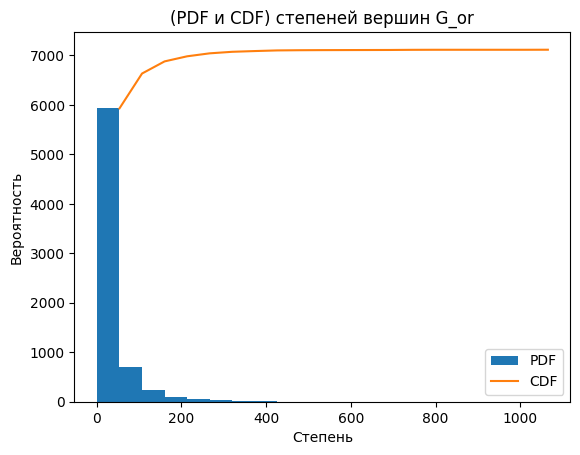

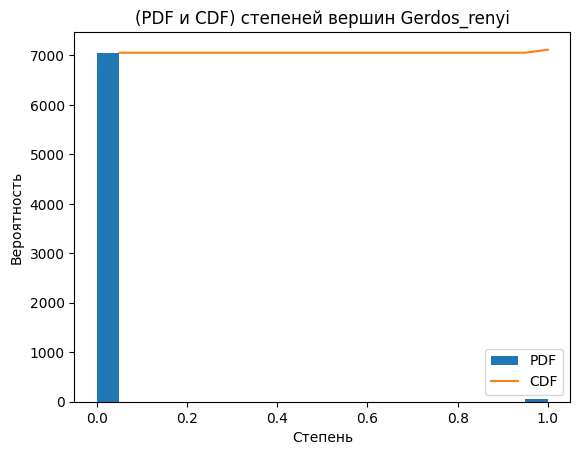

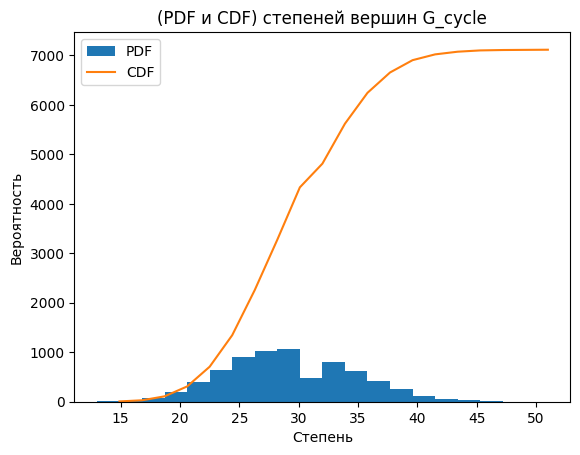

In [ ]:

degree_G_or = [degree for node, degree in G_or.degree()]#получаем степени
pdf, bins, patch = plt.hist(degree_G_or, bins=20, label='PDF')
cdf = np.cumsum(pdf)
plt.plot(bins[1:], cdf, label='CDF')
plt.title('(PDF и CDF) степеней вершин G_or')
plt.xlabel('Степень')
plt.ylabel('Вероятность')
plt.xscale('linear')
plt.legend()
plt.show()


degree_Gerdos_renyi = [degree for node, degree in Gerdos_renyi.degree()]
pdf, bins, patch = plt.hist(degree_Gerdos_renyi, bins=20, label='PDF')
cdf = np.cumsum(pdf)
plt.plot(bins[1:], cdf, label='CDF')
plt.title('(PDF и CDF) степеней вершин Gerdos_renyi')
plt.xlabel('Степень')
plt.ylabel('Вероятность')
plt.xscale('linear')
plt.legend()
plt.show()

degree_G_cycle = [degree for node, degree in G_cycle.degree()]
pdf, bins, patch = plt.hist(degree_G_cycle, bins=20,  label='PDF')
cdf = np.cumsum(pdf)
plt.plot(bins[1:], cdf, label='CDF')
plt.title('(PDF и CDF) степеней вершин G_cycle')
plt.xlabel('Степень')
plt.ylabel('Вероятность')
plt.xscale('linear')
plt.legend()
plt.show()

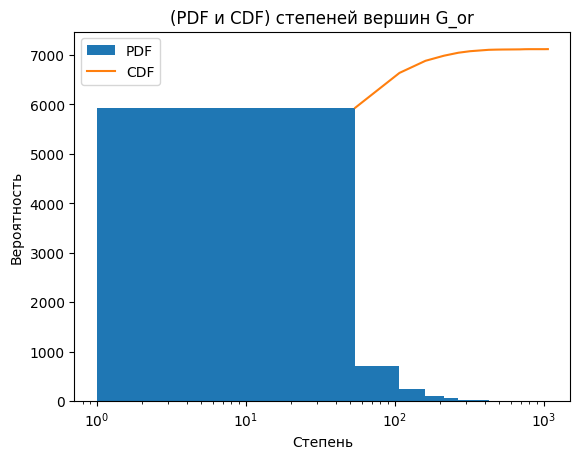

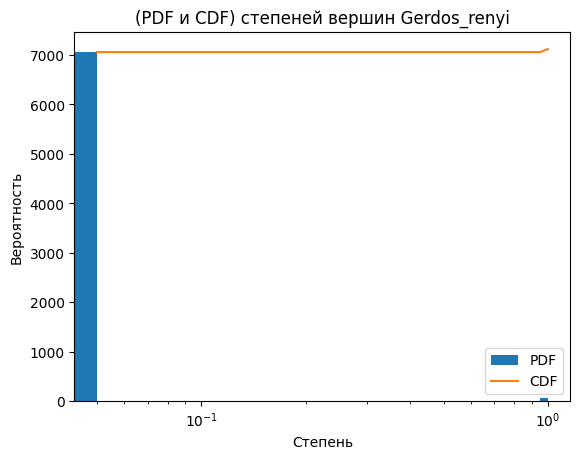

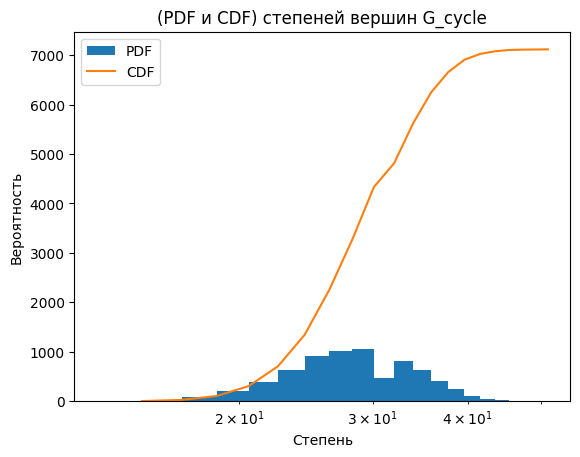

In [ ]:
degree_G_or = [degree for node, degree in G_or.degree()]#получаем степени
pdf, bins, patch = plt.hist(degree_G_or, bins=20, label='PDF')
cdf = np.cumsum(pdf)
plt.plot(bins[1:], cdf, label='CDF')
plt.title('(PDF и CDF) степеней вершин G_or')
plt.xlabel('Степень')
plt.ylabel('Вероятность')
plt.xscale('log')
plt.legend()
plt.show()


degree_Gerdos_renyi = [degree for node, degree in Gerdos_renyi.degree()]
pdf, bins, patch = plt.hist(degree_Gerdos_renyi, bins=20, label='PDF')
cdf = np.cumsum(pdf)
plt.plot(bins[1:], cdf, label='CDF')
plt.title('(PDF и CDF) степеней вершин Gerdos_renyi')
plt.xlabel('Степень')
plt.ylabel('Вероятность')
plt.xscale('log')
plt.legend()
plt.show()

degree_G_cycle = [degree for node, degree in G_cycle.degree()]
pdf, bins, patch = plt.hist(degree_G_cycle, bins=20,  label='PDF')
cdf = np.cumsum(pdf)
plt.plot(bins[1:], cdf, label='CDF')
plt.title('(PDF и CDF) степеней вершин G_cycle')
plt.xlabel('Степень')
plt.ylabel('Вероятность')
plt.xscale('log')
plt.legend()
plt.show()

In [ ]:
pip install vk


In [ ]:
pip install vk_api

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 1.9 MB/s eta 0:00:00


In [ ]:
import vk_api
import vk
import time
import sys
import matplotlib.pyplot as plt
import networkx as nx


class VkData:
    # Your VK application ID and access token
    APP_ID = "rudakovasss"
    TOKEN = "2d34cf3315cb16e98a62d3f231e3cf14beb6e3ed9ab01527c183c0fee9985838db566b11501ff339a7394"

    # VK API version
    VERSION = "5.103"


# Class to store user info
class User:
    def __init__(self, us_info):
        self.id = us_info["id"]
        self.first_name = us_info["first_name"]
        self.last_name = us_info["last_name"]

        if "is_closed" in us_info:
            self.is_closed = us_info["is_closed"]
        else:
            self.is_closed = True

        if "is_deactivated" in us_info:
            self.is_closed = True

        self.domain = us_info["domain"]

    def __str__(self):
        return "{0} {1}\n".format(self.first_name, self.last_name)


# Get list of friends by user_id
def get_friends(vk_api, user_id, fields="domain"):
    friends = vk_api.friends.get(user_id=user_id, fields=fields)

    lst = [User(fr) for fr in friends["items"]]

    # In vk API there is a limit on requests per second.
    # Therefore, we sleep
    time.sleep(0.4)

    return lst


def main():
    if len(sys.argv) > 1:
        id = sys.argv[1]
    else:
        print("Если при парсинге будет возникать ошибка 'Too many requests per second', измените параметр time.sleep("
              ") в функции get_friends() на больший чем 0.4")
        print("ВНИМАНИЕ! \nПеред вводом ID откройте свою страницу, если она у вас закрыта. \n")
        id = input("rudakovasss: ").lstrip()

    # Authorization
    session = vk.AuthSession(access_token=VkData.TOKEN)
    vk_api = vk.API(session, v=VkData.VERSION)

    # If user enters screen_name, we need to get his ID
    id = vk_api.users.get(user_ids=id)[0]["id"]

    # Friends Graph is dictionary
    # Key - friend, graph vertex
    # Value - list of mutual friends, adjacent vertices
    graph = {}
    # Get list of friends for entered ID
    friends = get_friends(vk_api, id)
    mutual = []
    list_friends_of_friends = dict()

    # Fill graph
    for friend in friends:
        print('Processing', "\tid: ", friend.id,
              "\tИмя и Фамилия : ", friend.first_name, friend.last_name)
        list_friends_of_friends.setdefault(friend.id, [])  # Здесь инициализируется список всех друзей всех МОИХ друзей по id
        # If the profile is not hidden
        if not friend.is_closed:
            # Get friends of friend
            all_friends = get_friends(vk_api, friend.id)
            # Find mutual friends
            list_friends_of_friends[friend.id] = all_friends  # Пополняем наш список id друзьями всех МОИХ друзей

            # С этого момента в принципе данный блок кода не особо важен, так как в дальнейшем он не используется
            # но здесь происходит пополнение списка "общих" друзей. Возможно, его можно как-то использовать
            for i in all_friends:  # Для каждого друга МОЕГО друга
                for j in friends:  # для каждого МОЕГО друга
                    if i.id == j.id:  # смотрим, чтобы друг друга и МОЙ друг были одинаковы
                        mutual.append(j)  # если так, то добавляем МОЕГО ДРУГА в "общие" type(list)

            # Add value in dictionary
            graph[friend] = mutual  # пополняем словарь (type(dict)) списком МОИХ друзей
        else:
            graph[friend] = list()

    # Теперь самое интересное - создание связного графа
    G = nx.Graph()  # здесь будут храниться id МОИХ друзей
    for k in friends:
        G.add_node(k.id)
        G.nodes[k.id]['name234'] = k.first_name + " " + k.last_name

    # Записываем ребра графа друзей
    for myFriendID in list(G.nodes()):  # для каждого МОЕГО друга
        for friendOfFriend in list_friends_of_friends[myFriendID]:  # для каждого друга друга в списке всех друзей МОИХ друзей
            for i in list(G.nodes()):  # для каждого МОЕГО друга
                if friendOfFriend.id == i:  # Если id друга МОЕГО друга совпадает с id МОЕГО друга (2-й и 3-й цикл)
                    G.add_edge(friendOfFriend.id, myFriendID)  # Добавляем ребро между ними

    # импорт графа в файл .dot для Gephi
    path_gexf = "./vk_friends_graph.gexf"
    path_gz = "./vk_friends_graph.gz"

    G = nx.MultiDiGraph(G)

    nx.readwrite.write_gexf(G, path_gexf, encoding='UTF-8')
    nx.readwrite.write_pajek(G, path_gz, encoding='UTF-8')

    # Увы, но экспорт в файл .dot не работает, он не может перекодировать имена людей ВК, содержащие некоторые
    # символы ASCII. В любом случае, эта "фича" необходима для визуализации в Gephi. Довольствуемся предыдущими двумя
    # форматами
    # path_dot = "./vk_friends_graph.dot"
    # for pydot_node in G.nodes():
    #     G.nodes[pydot_node]['name234'] = G.nodes[pydot_node]['name234'.encode("UTF-8")]
    # nx.drawing.nx_pydot.write_dot(G, path_dot)

    print("Ребра:", G.edges())
    print(G)
    nx.draw(G)
    plt.show()


if __name__ == '__main__':
    main()


AttributeError: ignored

In [ ]:
IMDB = pd.read_table('/content/drive/My Drive/data/imdb_actor_edges.tsv', sep='\t', names=['actor1', 'actor2', 'num_movies'], encoding='latin1')
print(IMDB)


        actor1  actor2  num_movies
0       actor1  actor2  num_movies
1        17776   17778           6
2         5578    9770           3
3         5578     929           2
4         5578    9982           2
...        ...     ...         ...
287070    4462   12854           2
287071    4462   10542           2
287072    4462    4475           2
287073    4462   10498           3
287074    4462   12075           3

[287075 rows x 3 columns]


<ipython-input-4-f11ece74d042>:1: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  IMDB = pd.read_table('/content/drive/My Drive/data/imdb_actor_edges.tsv', sep='\t', names=['actor1', 'actor2', 'num_movies'], encoding='latin1')


In [ ]:
# Создание графа
G = nx.Graph()

# Добавление вершин в граф
vertices = random.sample(list(IMDB['actor1'].unique()), min(1000, len(IMDB['actor1'].unique())))
G.add_nodes_from(vertices)

# Добавление ребер в граф
for index, row in IMDB.iterrows():
    actor1 = row['actor1']
    actor2 = row['actor2']
    num_movies = row['num_movies']
    G.add_edge(actor1, actor2, weight=num_movies)

# Вывод случайного подграфа
print(G)

Graph with 26576 nodes and 287075 edges


In [ ]:
def snowballsampling(G, maxsize):
    nodes = list(G.nodes())
    subgraph = set()
    seed = random.choice(nodes)
    subgraph.add(seed)

    while len(subgraph) < maxsize:
        current_node = random.choice(list(subgraph))
        neighbors = set(G.neighbors(current_node))
        new_nodes = neighbors - subgraph
        if len(new_nodes) == 0:
            break
        subgraph.update(new_nodes)

    return subgraph

snowhowhow = snowballsampling(G, maxsize=1000)
print("Снежный ком данные:",snowhowhow)



Снежный ком данные: {'14068', '159', '1600', '1756', '406', '1838', '1884', '2278', '1732', '203', '13085', '1965', '6271', '7220', '207', '73', '1917', '1724', '1718', '1820', '143', '1738', '1832', '6268', '6334', '2348', '1606', '12439', '11787', '13105', '1995', '6431', '2328', '2322', '10042', '14361', '12509', '6434', '1881', '7514', '1938', '1719', '1575', '1807', '1750', '1962', '1673', '6273', '14064', '11488', '10069', '1728', '6253', '86', '14738', '6239', '1818', '1641', '6296', '1737', '1709', '94', '1647', '3666', '1614', '6198', '6227', '1909', '1963', '1694', '1597', '1623', '6250', '11482', '12210', '3663', '13033', '14692', '14705', '1736', '12488', '10695', '6256', '96', '1747', '1714', '1557', '1991', '12540', '79', '1670', '6255', '1683', '120', '2358', '1778', '7519', '1932', '6323', '1906', '6224', '1669', '1722', '1885', '1642', '1659', '1759', '114', '58', '6195', '139', '1919', '2324', '10061', '1605', '95', '1580', '184', '1987', '6438', '11493', '1988', '195

Плотность графа: 0.0008093696828794556


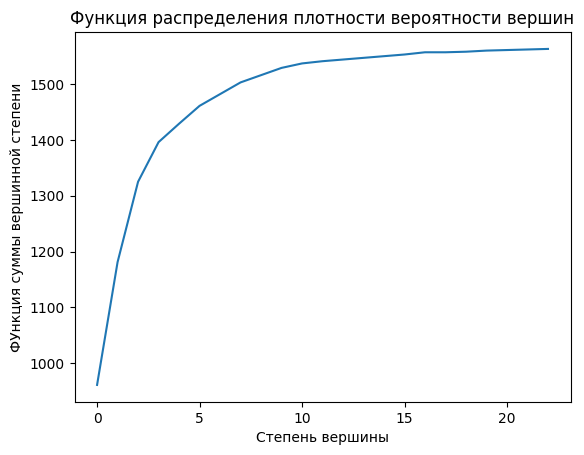

In [ ]:
density = nx.density(G)
print("Плотность графа:", density)
#average_path_length = nx.average_shortest_path_length(G)
#print("Средняя длина пути:", average_path_length)
degree_distribution = nx.degree_histogram(G)
summ = np.cumsum(degree_distribution)
plt.plot(summ)
plt.xlabel("Степень вершины")
plt.ylabel("ФУнкция суммы вершинной степени")
plt.title("Функция распределения плотности вероятности вершин")
plt.show()

Плотность графа: 0.12009622437521944
Средняя длина пути: 1.9799729542760403


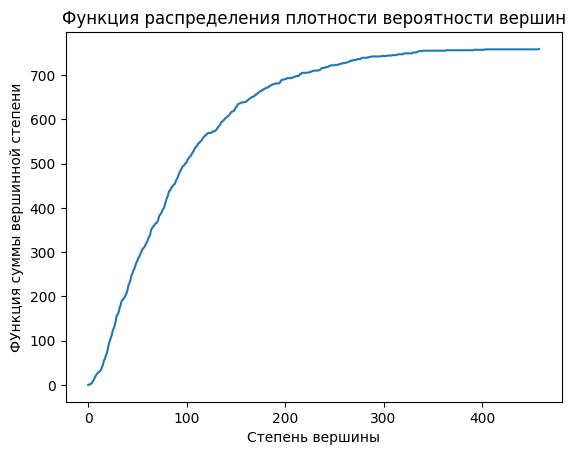

In [ ]:
density = nx.density(G.subgraph(snowhowhow))
print("Плотность графа:", density)
average_path_length = nx.average_shortest_path_length(G.subgraph(snowhowhow))
print("Средняя длина пути:", average_path_length)
degree_distribution = nx.degree_histogram(G.subgraph(snowhowhow))
summ = np.cumsum(degree_distribution)
plt.plot(summ)
plt.xlabel("Степень вершины")
plt.ylabel("ФУнкция суммы вершинной степени")
plt.title("Функция распределения плотности вероятности вершин")
plt.show()


Graph with 1566 nodes and 988 edges
Плотность графа: 0.000806270631102624


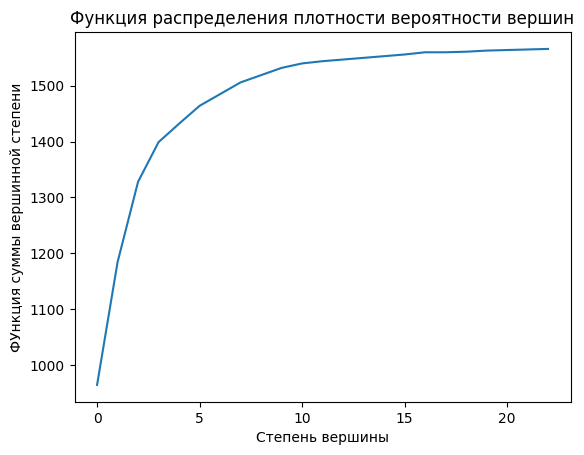

Graph with 1577 nodes and 988 edges
Плотность графа: 0.0007950584062136872


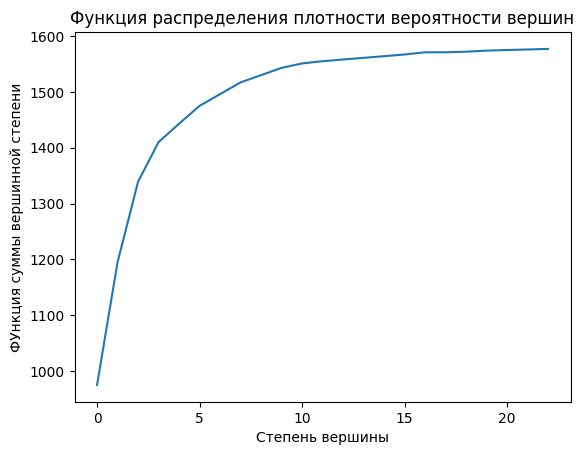

Graph with 1559 nodes and 988 edges
Плотность графа: 0.0008135296234296532


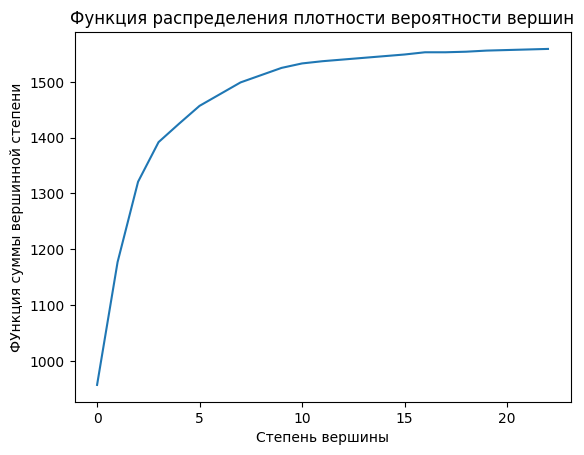

Graph with 1567 nodes and 988 edges
Плотность графа: 0.0008052415683954095


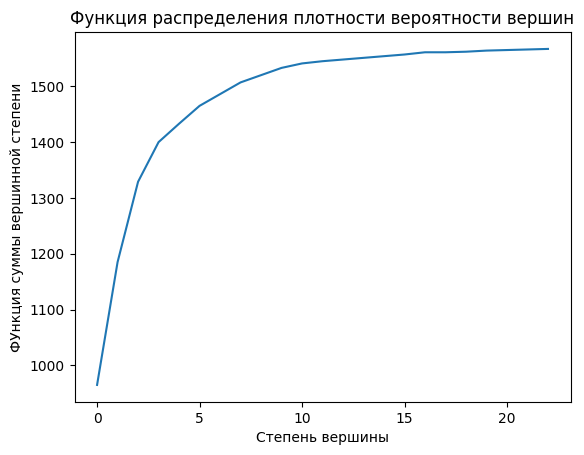

Graph with 1564 nodes and 988 edges
Плотность графа: 0.0008083346832849805


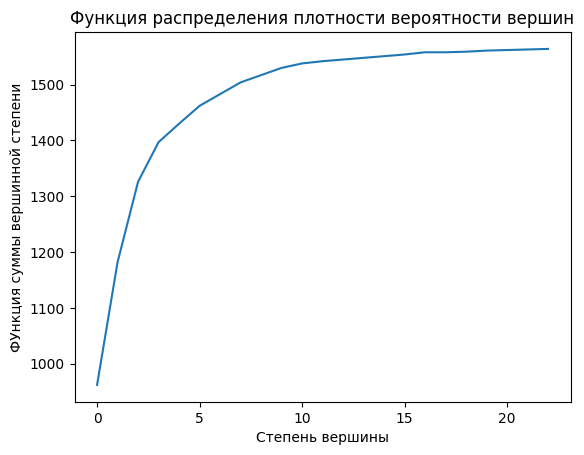

Graph with 1573 nodes and 988 edges
Плотность графа: 0.000799108363299897


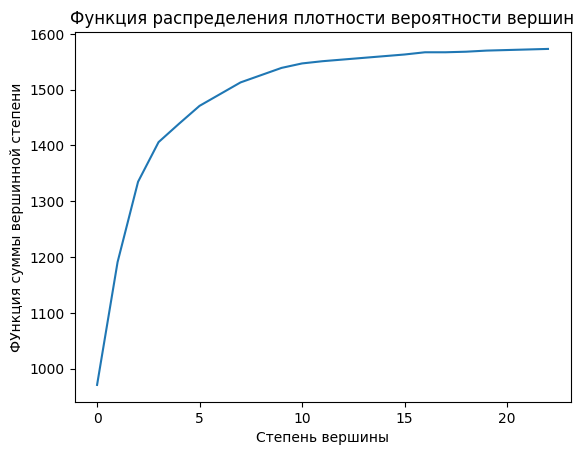

Graph with 1562 nodes and 988 edges
Плотность графа: 0.0008104066715826963


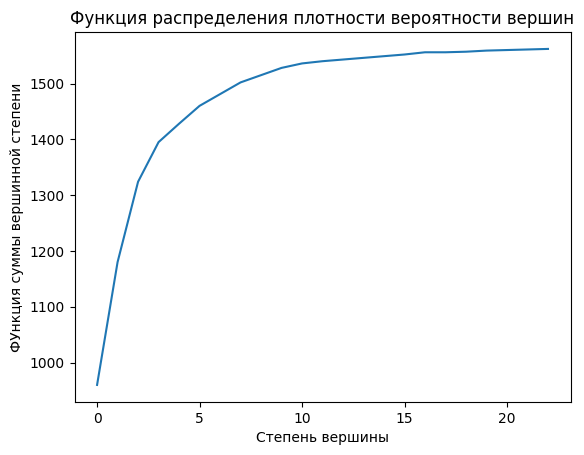

Graph with 1563 nodes and 988 edges
Плотность графа: 0.0008093696828794556


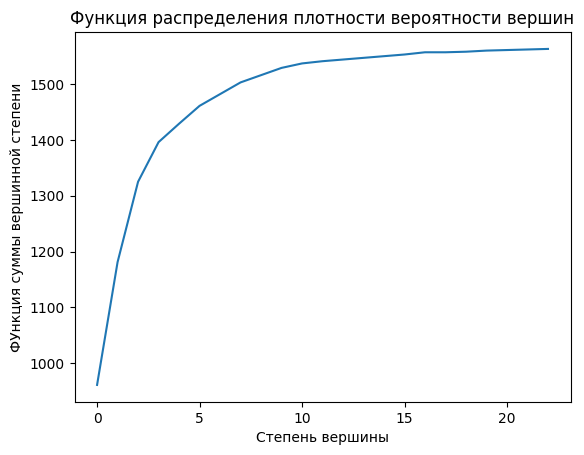

Graph with 1570 nodes and 988 edges
Плотность графа: 0.0008021661734318991


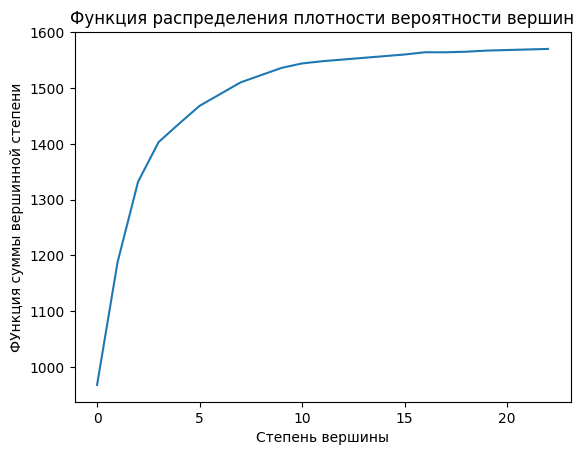

Graph with 1566 nodes and 988 edges
Плотность графа: 0.000806270631102624


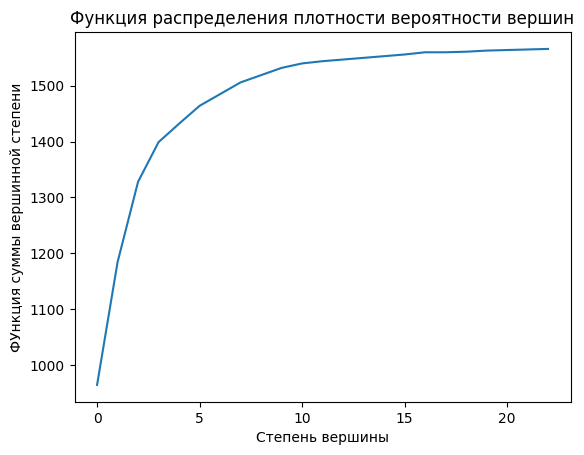

Graph with 1556 nodes and 988 edges
Плотность графа: 0.0008166706618504038


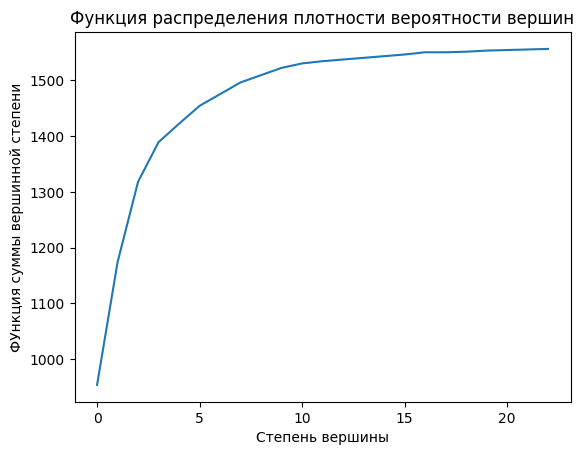

Graph with 1562 nodes and 988 edges
Плотность графа: 0.0008104066715826963


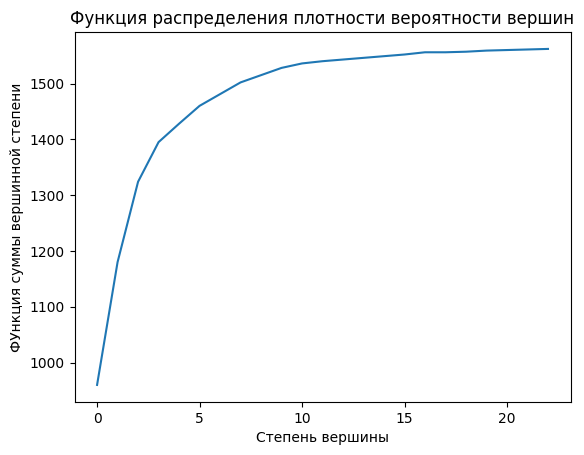

Graph with 1565 nodes and 988 edges
Плотность графа: 0.0008073016677152872


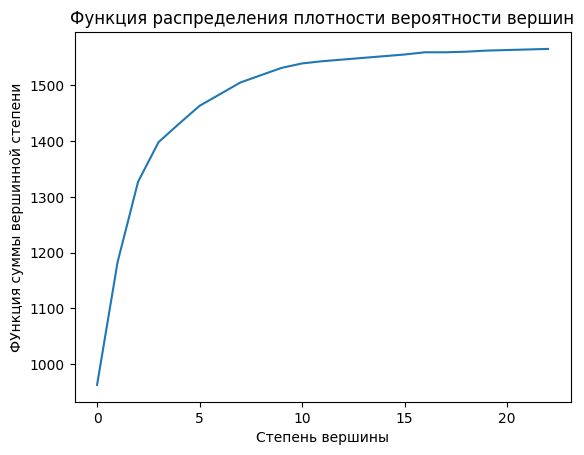

Graph with 1561 nodes and 988 edges
Плотность графа: 0.0008114456544949818


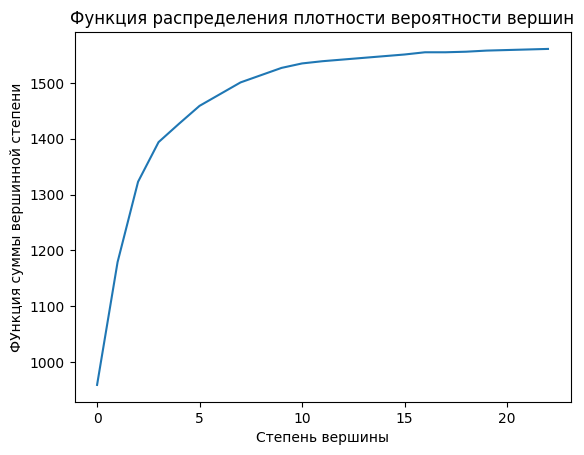

Graph with 1567 nodes and 988 edges
Плотность графа: 0.0008052415683954095


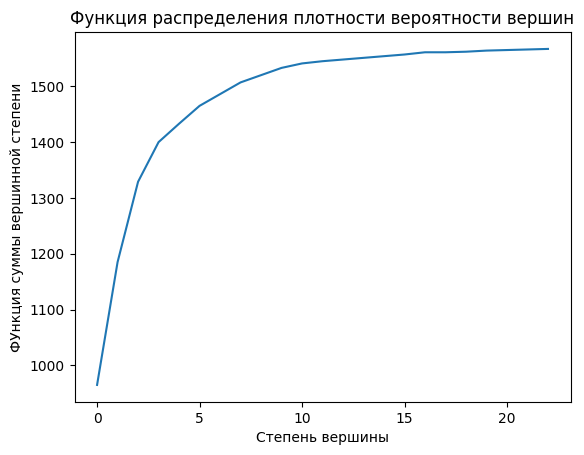

Graph with 1555 nodes and 988 edges
Плотность графа: 0.0008177217180432614


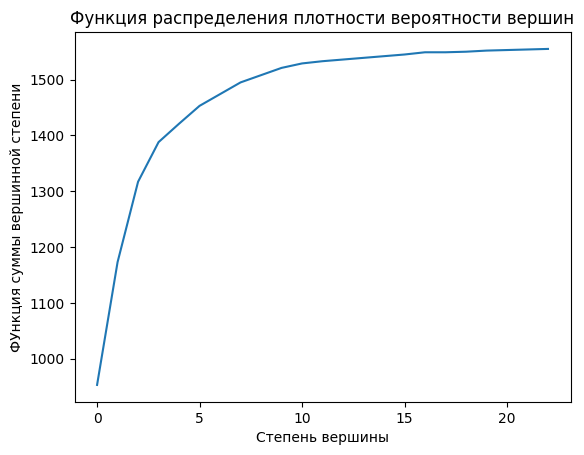

Graph with 1567 nodes and 988 edges
Плотность графа: 0.0008052415683954095


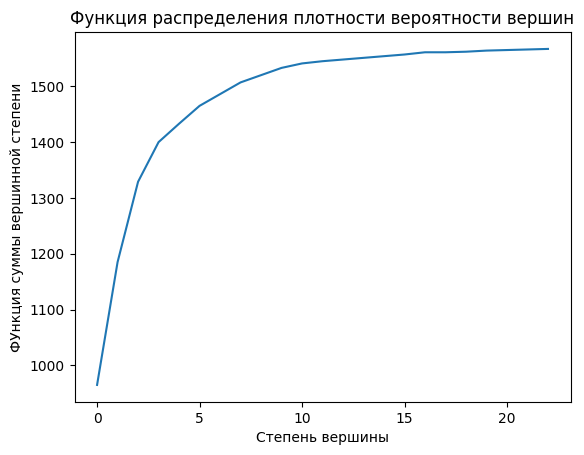

Graph with 1557 nodes and 988 edges
Плотность графа: 0.0008156216308139871


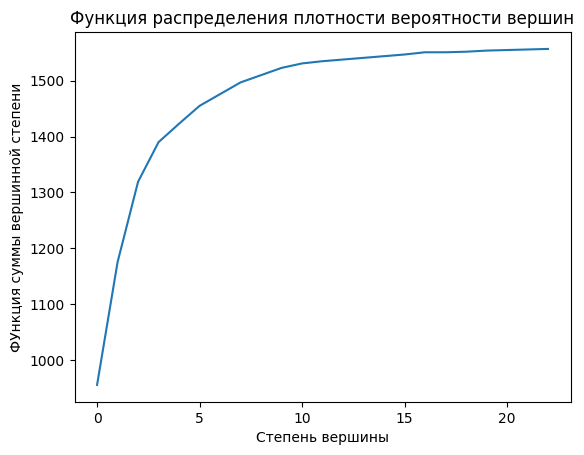

Graph with 1567 nodes and 988 edges
Плотность графа: 0.0008052415683954095


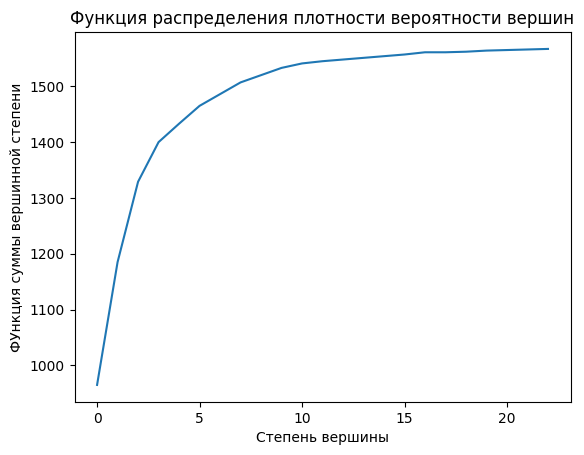

Graph with 1572 nodes and 988 edges
Плотность графа: 0.0008001256877598587


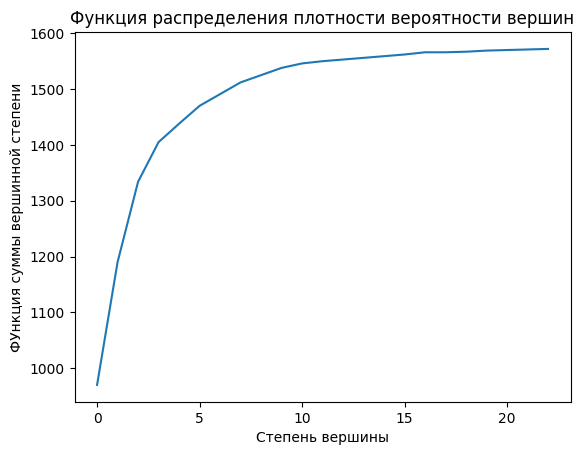

In [ ]:

for i in range(20):
    # Создание графа
    G = nx.Graph()

    # Добавление вершин в граф
    vertices = random.sample(list(IMDB['actor1'].unique()), min(1000, len(IMDB['actor1'].unique())))
    G.add_nodes_from(vertices)

    # Добавление ребер в граф
    for index, row in edges.iterrows():
        actor1 = row['actor1']
        actor2 = row['actor2']
        num_movies = row['num_movies']
        G.add_edge(actor1, actor2, weight=num_movies)

    # Вывод подграфа
    print(G)

    density = nx.density(G)
    print("Плотность графа:", density)

    degree_distribution = nx.degree_histogram(G)
    summm = np.cumsum(degree_distribution)

    # Построение графика
    plt.plot(summm)

    plt.xlabel("Степень вершины")
    plt.ylabel("ФУнкция суммы вершинной степени")
    plt.title("Функция распределения плотности вероятности вершин")
    plt.show()

Снежный ком данные: {4280, 7567}
Плотность графа: 1.0
Средняя длина пути: 1.0


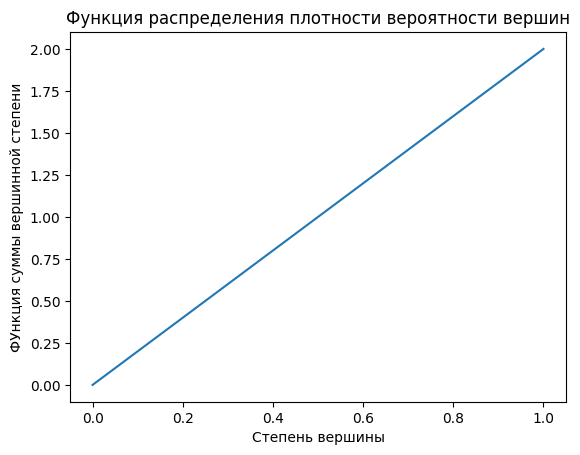

Снежный ком данные: {'11236', '6662', '6803', '7390', '7948', '3992', '6910', '4928', '4011', '3289', '10121', '6646', '4934', '15742', '10969', '6645', '939', '6649', '10001', '5567', '10115', '3745', '4004', '3465', '6756', '13147', '4931', '5572', '16854', '7820', '4454', '16327', '8731', '6841', '16137', '7359', '3541', '7122', '6792', '9497', '14104', '13161', '6670', '5629', '16857', '5550', '838', '6891', '824', '404', '6867', '15627', '6873', '13150', '7904', '4077', '5542', '6925', '882', '11597', '6638', '15583', '4935', '692', '6752', '2081', '6816', '6619', '6790', '2701', '4076', '6808', '6759', '6797', '610', '7892', '4074', '6824', '3510', '7889', '3741', '5634', '7986', '6654', '11561', '12226', '9247', '11447', '4068', '827', '7357', '9498', '6848', '3530', '617', '6802', '867', '3429', '10111', '6926', '6834', '3702', '5728', '13160', '6913', '6772', '6933', '6794', '737', '704', '6653', '13158', '6807', '556', '6890', '2922', '6870', '614', '6920', '7940', '3967', '9

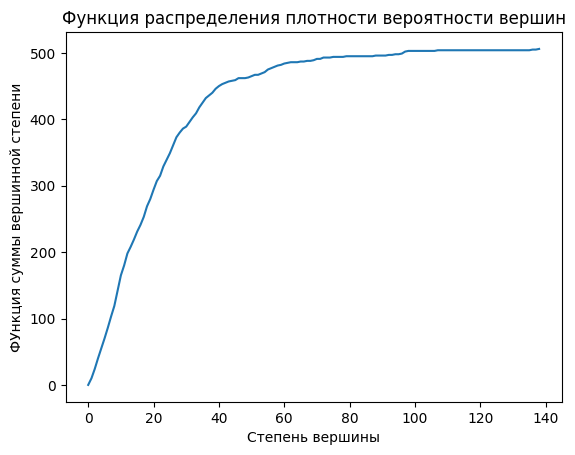

Снежный ком данные: {'745', '3407', '3364', '3992', '2927', '645', '3289', '694', '2921', '9483', '693', '6499', '7719', '2689', '527', '3280', '8987', '9274', '2645', '476', '11318', '14085', '5660', '2006', '679', '9431', '3884', '553', '8573', '4211', '574', '3264', '1495', '2633', '3875', '6857', '6501', '15282', '673', '3961', '3265', '482', '8972', '895', '3030', '718', '3166', '391', '503', '3298', '529', '2896', '401', '3948', '3284', '8469', '3252', '2642', '665', '3307', '9016', '660', '10903', '4502', '3510', '7169', '989', '699', '3295', '827', '11569', '16073', '8470', '661', '6502', '640', '3578', '5657', '8085', '2924', '4197', '2635', '704', '1275', '8687', '3366', '2922', '3876', '9881', '3248', '10381', '2629', '3580', '2605', '5652', '8468', '5738', '8438', '3860', '4961', '4206', '10895', '3247', '2627', '6715', '3938', '1506', '724', '710', '8473', '10894', '3291', '2597', '11612', '3255', '3316', '564', '555', '3975', '739', '729', '2628', '3958', '8741', '2607', 

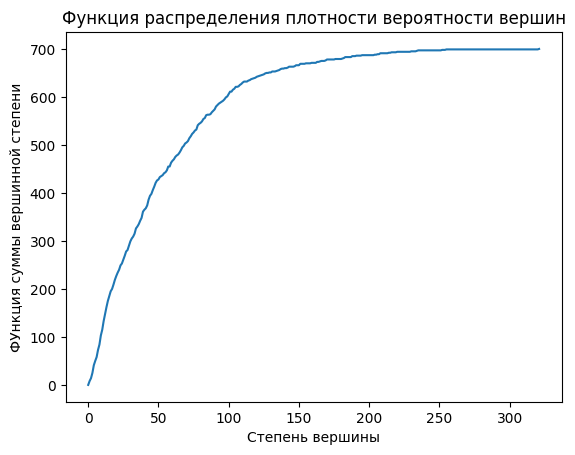

Снежный ком данные: {'4851', '4846', '7778', '2949', '10372', '10424', '2961', '6081', '6076', '1281', '13692', '17832', '14315', '17422', '2987', '7945', '2953', '6504', '15101', '693', '2871', '1217', '1280', '2850', '7448', '1213', '9880', '15042', '13456', '5904', '2962', '14325', '10433', '10434', '13702', '2873', '3303', '8987', '10101', '1174', '1529', '14792', '5993', '2913', '14086', '6088', '16338', '2006', '15174', '6721', '4957', '14452', '3160', '13264', '10874', '9142', '10096', '2828', '6080', '15461', '2830', '2930', '10284', '3961', '1006', '6082', '17217', '6457', '10439', '14454', '15681', '3182', '1152', '5795', '9538', '10420', '1525', '4840', '14794', '6374', '12668', '5777', '3077', '6462', '15044', '14323', '2956', '9892', '2845', '2643', '7343', '16434', '7372', '2929', '6142', '6062', '12606', '2964', '4862', '3154', '6033', '4849', '2856', '2970', '1158', '2947', '2800', '6353', '4197', '4841', '10097', '6072', '16835', '10098', '2838', '10727', '10088', '118

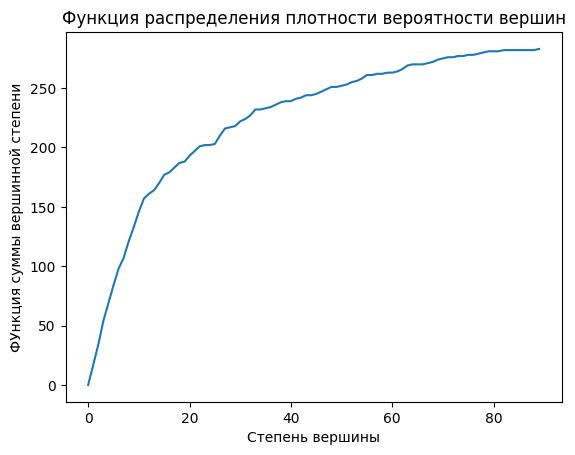

Снежный ком данные: {'3240', '14091', '8171', '8234', '1548', '14217', '10655', '3896', '4262', '14093', '1370', '2738', '7863', '14231', '2132', '4258', '1290', '15742', '765', '10640', '1291', '4932', '8571', '4004', '5017', '9751', '5026', '8653', '8540', '10692', '8535', '8545', '12828', '13887', '8296', '3623', '2014', '5027', '4286', '14077', '5629', '4307', '1307', '8516', '8547', '673', '3708', '1361', '769', '3446', '404', '12120', '3692', '2417', '4019', '4370', '8172', '566', '14090', '5601', '4267', '5757', '529', '551', '637', '3948', '8785', '1411', '1391', '3307', '9981', '8700', '10605', '8160', '803', '12665', '1156', '5030', '8166', '8167', '8788', '835', '7389', '9254', '4024', '3945', '876', '5489', '8200', '3381', '560', '3429', '7098', '1311', '2406', '4269', '1396', '3606', '5728', '737', '3557', '9578', '870', '4287', '8538', '9400', '4316', '3213', '7823', '1412', '2726', '8542', '5024', '3375', '4283', '1387', '8548', '10611', '8789', '8100', '4332', '5604', '

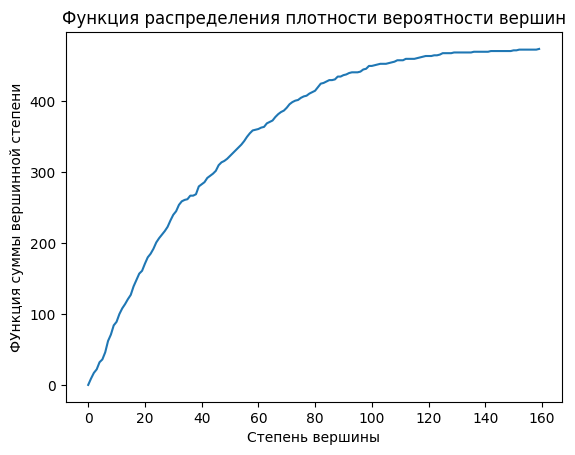

Снежный ком данные: {2408, 6679, 8191}
Плотность графа: 0.6666666666666666
Средняя длина пути: 1.3333333333333333


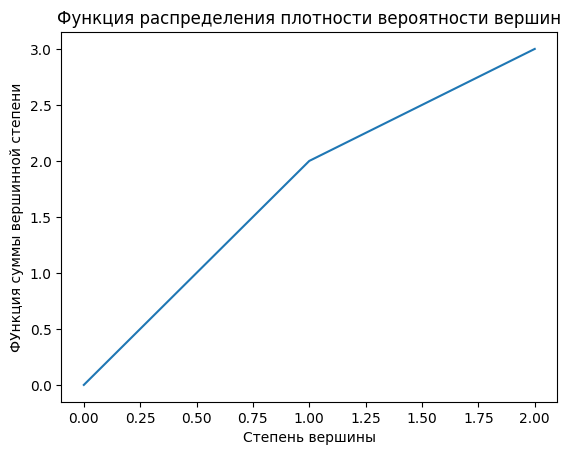

Снежный ком данные: {'266', '15872', '9674', '15912', '15863', '14595', '14651', '13363', '8903', '2244', '2174', '959', '9662', '1517', '986', '12903', '8059', '12128', '9127', '14617', '8862', '13674', '14668', '8881', '2246', '8935', '2254', '9167', '9155', '1025', '12390', '9222', '14656', '2152', '240', '15134', '14673', '2183', '953', '14662', '6355', '2228', '5083', '13928', '2221', '12392', '14154', '2260', '9690', '9125', '5085', '5147', '5144', '14603', '13461', '2186', '2155', '14667', '300', '12885', '16883', '8304', '237', '281', '9164', '8949', '2209', '9206', '5150', '5109', '9124', '9123', '8944', '1261', '2206', '14672', '9168', '303', '9526', '12888', '2198', '9676', '989', '306', '9684', '977', '12883', '2264', '1023', '9116', '9681', '5157', '8886', '962', '1265', '2250', '2227', '51', '5117', '5096', '2167', '12897', '302', '974', '9190', '13927', '12889', '8931', '2232', '5155', '1019', '268', '981', '6159', '15130', '6065', '9200', '9663', '10346', '2147', '6826'

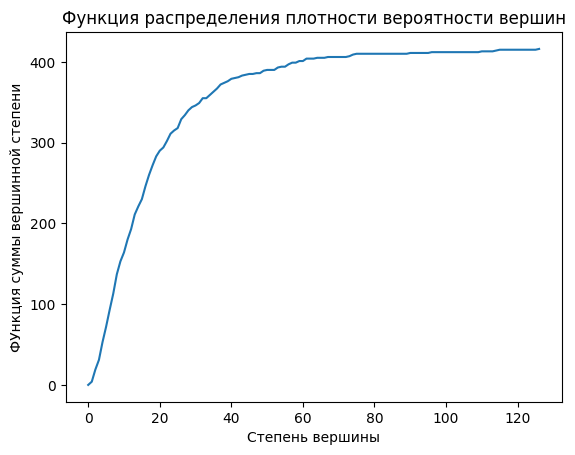

Снежный ком данные: {2304, 11781, 11782, 14354, 2323, 2336, 13093, 2342, 2344, 12330, 14893, 13102, 12334, 12335, 13620, 10052, 10053, 1861, 14919, 12359, 10060, 1869, 1623, 14700, 7535, 7536, 7537, 7538, 14714, 1664, 1923, 148, 151, 1950, 15011, 15017, 15020, 15022, 15023, 187, 188, 11969, 195, 13509, 12500, 12501, 12502, 1756, 2270, 11998, 12512, 12513, 12514, 12515, 12516, 13022, 2278, 11490, 11498, 2287, 12528, 13042, 2290, 12537, 2298}
Плотность графа: 0.08365384615384615
Средняя длина пути: 1.916346153846154


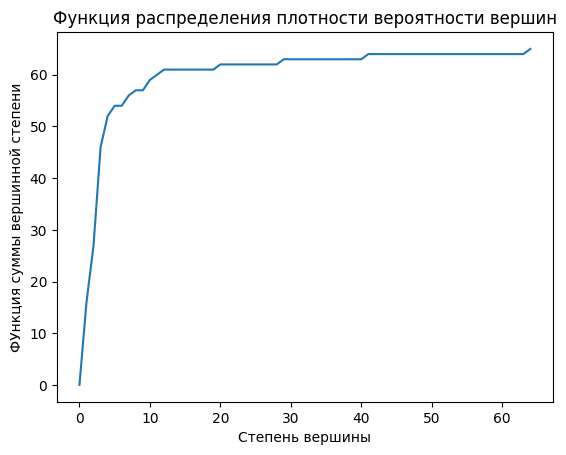

Снежный ком данные: {'10746', '10765', '7408', '7409', '5166', '10768', '8078', '7431', '7407', '8079'}
Плотность графа: 0.5111111111111111
Средняя длина пути: 1.488888888888889


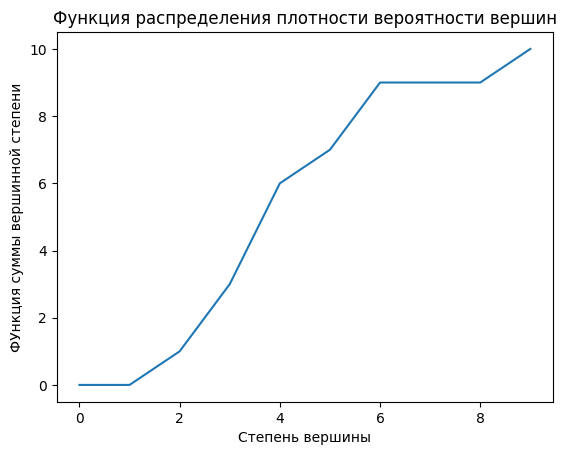

Снежный ком данные: {'4598', '15340', '3046', '5945', '6599', '11922', '5863', '6593', '13487', '12281', '12599', '11218', '3066', '14294', '2531', '6527', '13624', '16265', '3087', '3034', '11185', '2766', '1111', '14598', '14528', '15938', '2521', '13968', '14021', '11195', '2515', '12567', '5889', '11930', '1473', '6569', '5837', '11220', '6601', '4624', '3100', '2582', '2493', '14599', '11163', '4656', '3032', '2476', '2580', '5936', '5894', '3086', '3052', '12570', '12254', '11170', '2739', '12561', '5921', '4593', '14292', '14516', '12719', '5930', '3124', '11854', '11862', '11191', '11876', '11172', '11832', '6586', '13972', '5810', '11200', '2581', '11915', '11943', '11934', '6515', '2482', '15937', '16330', '2488', '5269', '1481', '5946', '5870', '5822', '14510', '2751', '2774', '5961', '6010', '11845', '6014', '5841', '12623', '12587', '13707', '1480', '5965', '11215', '5893', '5831', '2525', '5935', '4589', '4642', '11821', '8068', '14529', '16260', '15350', '15346', '12579'

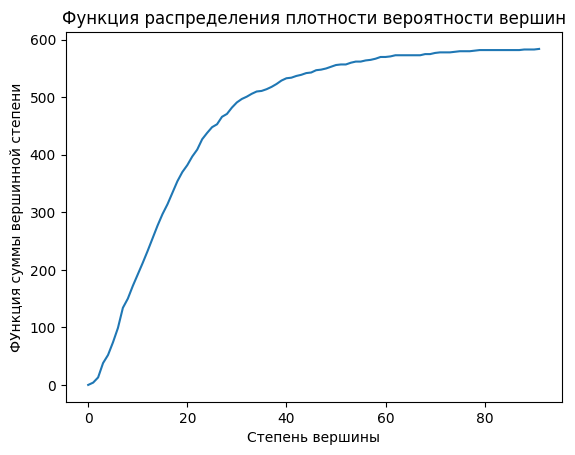

Снежный ком данные: {'745', '4222', '3364', '14469', '8995', '3289', '400', '6513', '694', '645', '9483', '693', '9039', '9329', '6499', '2999', '10625', '2689', '527', '3280', '8987', '11072', '10878', '2645', '476', '5660', '9431', '2006', '7714', '679', '553', '4211', '574', '3264', '9972', '2633', '3875', '6501', '11037', '3961', '559', '3604', '3265', '4220', '9008', '3030', '13982', '9464', '391', '3166', '588', '503', '3298', '529', '3276', '2896', '401', '3948', '3284', '7381', '11613', '3252', '2642', '665', '3307', '9016', '660', '3855', '9019', '4502', '11256', '7169', '5663', '4216', '699', '3295', '12226', '11569', '2703', '4986', '6991', '9000', '661', '9463', '9003', '640', '2969', '2608', '3606', '4415', '2947', '4197', '3127', '2635', '4219', '704', '2728', '8687', '1275', '2090', '7506', '2922', '9316', '3906', '3248', '11556', '3870', '3876', '9881', '12904', '8414', '2629', '2605', '12831', '9337', '6508', '5604', '3860', '9411', '4200', '3513', '3247', '2627', '393

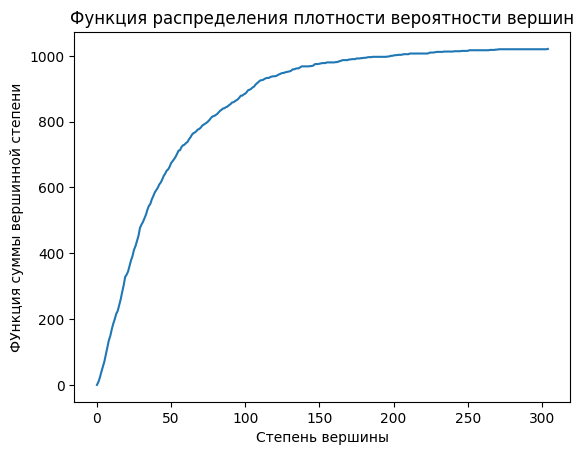

Снежный ком данные: {11774, 14806}
Плотность графа: 1.0
Средняя длина пути: 1.0


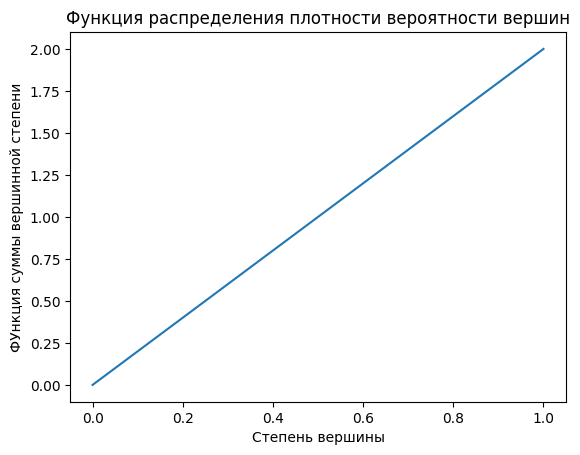

Снежный ком данные: {'14068', '159', '1600', '1756', '406', '1929', '203', '1884', '1965', '14354', '6271', '207', '7220', '12969', '8840', '73', '1724', '1718', '1820', '1738', '143', '1832', '6268', '6334', '11967', '10035', '15083', '12970', '7552', '2348', '14912', '14070', '12439', '499', '11787', '12489', '6431', '6445', '6424', '2328', '2322', '10042', '6333', '1702', '6434', '1881', '7514', '17526', '1719', '1575', '1962', '1807', '1750', '7533', '1673', '6273', '14064', '14367', '6253', '1728', '14878', '86', '7522', '7561', '11783', '14738', '6239', '1818', '17151', '1641', '6296', '1737', '7548', '3666', '1614', '6198', '6227', '1909', '126', '14353', '1660', '12000', '12336', '1623', '1597', '197', '2339', '6293', '3663', '14692', '14705', '11950', '10695', '6256', '10059', '96', '12312', '6406', '1747', '1714', '1557', '12309', '1991', '6255', '1670', '1683', '120', '2358', '1967', '12532', '2310', '1778', '7519', '1932', '6224', '1906', '1885', '1669', '1722', '6323', '16

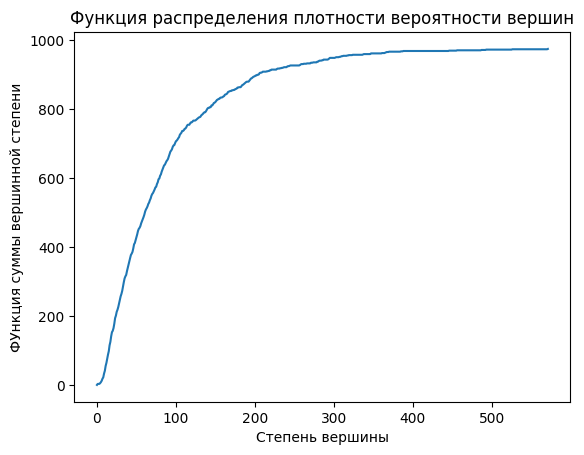

Снежный ком данные: {'2949', '7778', '1548', '3364', '4262', '14093', '8995', '9823', '2132', '4258', '6504', '8518', '6675', '693', '1217', '10640', '5012', '6499', '12985', '9329', '7719', '2873', '527', '8987', '3465', '11048', '8653', '2006', '7714', '3623', '8573', '2982', '14087', '574', '3264', '6501', '7194', '3961', '559', '15282', '2830', '3265', '1361', '6389', '6082', '404', '895', '12148', '8347', '718', '5601', '4267', '391', '588', '16511', '3298', '503', '529', '2896', '3276', '3077', '9499', '7381', '3284', '11613', '6462', '5628', '665', '3307', '2701', '9229', '9016', '1156', '660', '2136', '8596', '8529', '5798', '2021', '14124', '4341', '3945', '5663', '3295', '9247', '2892', '5033', '11569', '13047', '661', '15679', '4849', '6502', '2406', '10658', '4415', '2947', '3127', '9578', '3891', '704', '4287', '1275', '8687', '5788', '451', '4316', '7506', '3870', '3906', '3248', '570', '11556', '8140', '3375', '8334', '8548', '10611', '8458', '7590', '2986', '8438', '113

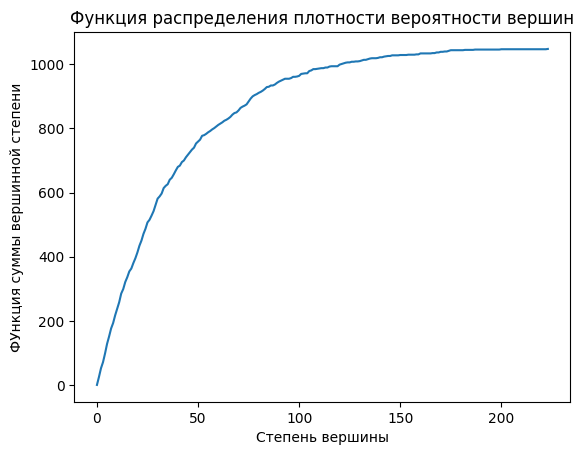

Снежный ком данные: {'14068', '1592', '159', '6208', '1600', '1756', '406', '1929', '1732', '203', '1838', '1965', '13085', '6271', '207', '7220', '12969', '8840', '1724', '1917', '1718', '1820', '12471', '1832', '12492', '1738', '6268', '6334', '12970', '15083', '7552', '2348', '1606', '12439', '499', '11787', '6445', '13089', '6424', '2328', '2322', '7564', '12509', '1702', '1881', '7253', '6190', '1938', '1575', '7533', '1962', '1807', '1761', '1673', '1750', '6408', '6273', '1687', '6253', '1728', '14878', '10069', '7522', '12973', '7190', '7561', '14738', '6239', '1818', '188', '6296', '6035', '1737', '1641', '1709', '1647', '3666', '1614', '6198', '7235', '6227', '1909', '12967', '1963', '1694', '1597', '1623', '11482', '2339', '12210', '6293', '11479', '3663', '14048', '12449', '1736', '11950', '6256', '6406', '1747', '6283', '1557', '12540', '79', '6255', '2358', '2310', '120', '1778', '7519', '1932', '11502', '6323', '6224', '1906', '1885', '1722', '1669', '1642', '1659', '175

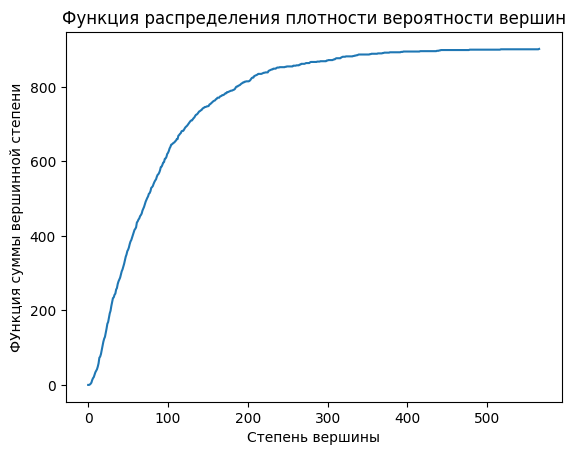

Снежный ком данные: {'11414', '14068', '745', '3407', '3364', '1600', '8995', '1838', '203', '645', '3289', '694', '2825', '400', '1884', '7220', '693', '1718', '9313', '9039', '1820', '9329', '7719', '527', '8987', '5017', '11072', '9274', '15950', '13695', '8338', '476', '14085', '11787', '2006', '679', '9431', '4349', '553', '6431', '9248', '9295', '8854', '8573', '9091', '8751', '14402', '574', '3875', '11402', '6501', '15282', '3961', '1881', '559', '7289', '4220', '1938', '1719', '6389', '1807', '1575', '1750', '1673', '16732', '9280', '11527', '391', '588', '503', '529', '14708', '2896', '3276', '3077', '1728', '401', '9499', '3948', '7381', '8469', '11613', '3252', '1818', '665', '3307', '8491', '9016', '7592', '1641', '11068', '1709', '660', '1647', '3666', '1614', '1909', '4216', '5663', '699', '1694', '3295', '1597', '7884', '4986', '661', '7761', '3359', '640', '15290', '16802', '4415', '1968', '4197', '10695', '3127', '10059', '14241', '704', '96', '8687', '1747', '1275', 

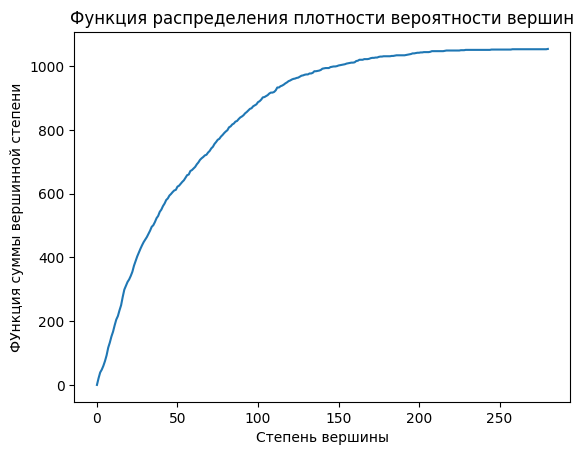

Снежный ком данные: {14857, 3339, 14860, 6923, 14109, 7966, 10015, 7971, 11043, 7973, 14133, 7991, 4930, 3143, 4936, 4935, 4943, 4945, 5714, 14165, 606, 5727, 5730, 611, 3683, 3685, 614, 613, 3687, 3688, 3691, 620, 3693, 3694, 3695, 623, 3696, 880, 3700, 3701, 8309, 11129, 3707, 12674, 3460, 10116, 3463, 8584, 3465, 3722, 7051, 8585, 3724, 3471, 7055, 7569, 7058, 7059, 7056, 7061, 8592, 6807, 3476, 3477, 3479, 8603, 8345, 3483, 10910, 10912, 10913, 10914, 10915, 10916, 7077, 8614, 8615, 10920, 10921, 4010, 10918, 5542, 13991, 4009, 5545, 3760, 5548, 3759, 5551, 5041, 6836, 3766, 3767, 5559, 12217, 3770, 5561, 12218, 8637, 5566, 5567, 7359, 4035, 5573, 3782, 5575, 5576, 3754, 4043, 12749, 7123, 7893, 3543, 4059, 13985, 5596, 4062, 6879, 3805, 11236, 9445, 9446, 4073, 4077, 6904}
Плотность графа: 0.03032258064516129
Средняя длина пути: 2.3721290322580644


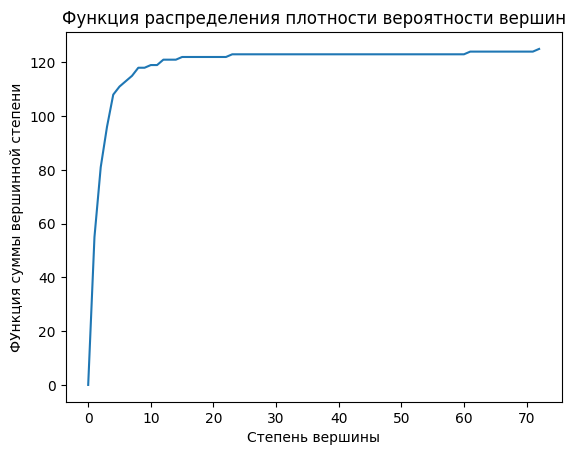

Снежный ком данные: {'16858', '6662', '6803', '6838', '6788', '12674', '7948', '4241', '7950', '6665', '13469', '4011', '6831', '6865', '6646', '3703', '6645', '6649', '6642', '10001', '6869', '3744', '13149', '12047', '3745', '9776', '12046', '6767', '13147', '8613', '6817', '7871', '7820', '16854', '4454', '6841', '6894', '6899', '16137', '13466', '15632', '6932', '6792', '13161', '6670', '6769', '6773', '7966', '16857', '6668', '5550', '6647', '6889', '5624', '6829', '6656', '6753', '12527', '6867', '6845', '15627', '6873', '3448', '13157', '3734', '16867', '13150', '6801', '890', '6887', '6925', '13143', '8587', '882', '15628', '6613', '4073', '4367', '6892', '6752', '6816', '6619', '13148', '6754', '6790', '13139', '4076', '6808', '6844', '6797', '6640', '15640', '6799', '6824', '3741', '6624', '6965', '8697', '6654', '6922', '6637', '12525', '16852', '7357', '6848', '11305', '6802', '867', '6635', '12526', '3702', '7944', '6913', '13160', '7984', '6933', '6794', '15641', '6618', 

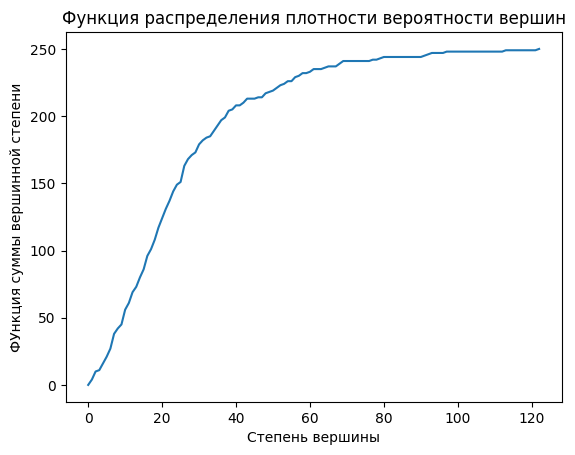

Снежный ком данные: {8712, 527, 15888, 2064, 6673, 537, 5660, 3615, 545, 5667, 550, 551, 2598, 1066, 1067, 560, 562, 6715, 2620, 7749, 2630, 14408, 3154, 2643, 596, 7767, 6758, 3183, 11377, 5746, 626, 10356, 8819, 12406, 10874, 4218, 3199, 10883, 644, 646, 10890, 650, 6795, 2701, 10894, 661, 3226, 2716, 2718, 9382, 10408, 681, 7848, 688, 695, 6842, 700, 701, 704, 3265, 707, 3268, 708, 710, 1223, 715, 716, 7373, 720, 724, 3285, 3292, 8420, 13029, 8424, 749, 3314, 2806, 758, 3318, 9466, 763, 9477, 778, 3859, 3354, 8987, 3360, 3361, 3371, 9004, 3885, 3884, 4912, 3888, 3893, 6463, 3906, 3907, 9026, 3912, 4427, 3916, 7500, 9037, 2896, 3923, 2902, 6497, 10593, 11108, 9067, 2926, 12663, 10616, 3448, 388, 3974, 3978, 9098, 399, 912, 3986, 7060, 8597, 3994, 411, 3488, 10147, 4007, 7596, 12205, 9136, 1459, 443, 4030, 8642, 5570, 7120, 3028, 6617, 3546, 5599, 481, 1506, 492, 493, 6131, 5624, 8697}
Плотность графа: 0.027293064876957495
Средняя длина пути: 1.9975838926174496


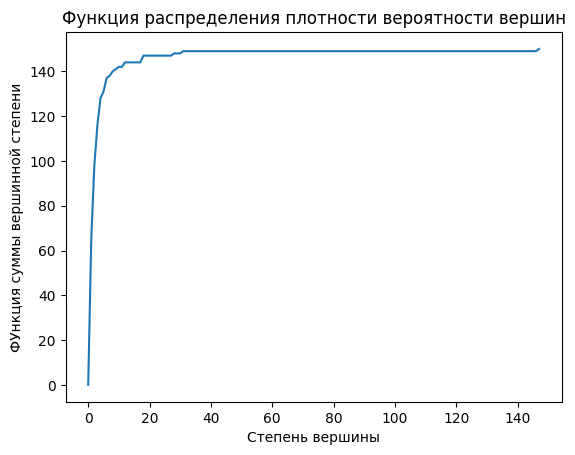

Снежный ком данные: {'1548', '4262', '14093', '1313', '2132', '8518', '6675', '8663', '693', '10640', '11238', '1291', '7260', '7719', '527', '1354', '5017', '6674', '11048', '11050', '8653', '6741', '5660', '7714', '1345', '553', '1416', '3623', '8573', '5682', '9091', '673', '3265', '1361', '8440', '404', '5601', '4267', '2806', '391', '1415', '8141', '3298', '3077', '401', '4989', '3948', '5628', '6676', '9229', '803', '1418', '1156', '5030', '15698', '8596', '4502', '4341', '1298', '3945', '1295', '8200', '4389', '11306', '2377', '1311', '2429', '10114', '6502', '2406', '10658', '2408', '9578', '4287', '4316', '8109', '3876', '12249', '8140', '10381', '8548', '5734', '10611', '5652', '1388', '1357', '6103', '8180', '2445', '2425', '4288', '6740', '4282', '15847', '4291', '3986', '3973', '1344', '12656', '5595', '1352', '12657', '12643', '9004', '1398', '3255', '3975', '1406', '4399', '8651', '1407', '875', '9021', '1389', '8465', '4345', '2720', '4170', '546', '8680', '7022', '4385

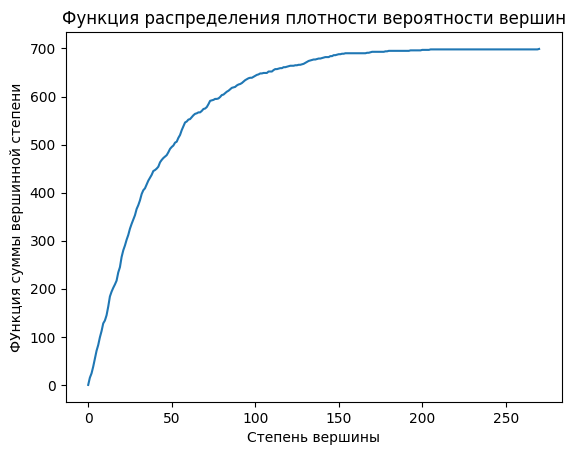

In [ ]:
for i in range(20):
    def snowballsampling(G, maxsize):
        nodes = list(G.nodes())
        subgraph = set()
        seed = random.choice(nodes)
        subgraph.add(seed)

        while len(subgraph) < maxsize:
            current_node = random.choice(list(subgraph))
            neighbors = set(G.neighbors(current_node))
            new_nodes = neighbors - subgraph
            if len(new_nodes) == 0:
                break
            subgraph.update(new_nodes)

        return subgraph

    snowhowhow = snowballsampling(G, maxsize=1000)
    print("Снежный ком данные:",snowhowhow)
    density = nx.density(G.subgraph(snowhowhow))
    print("Плотность графа:", density)
    average_path_length = nx.average_shortest_path_length(G.subgraph(snowhowhow))
    print("Средняя длина пути:", average_path_length)
    degree_distribution = nx.degree_histogram(G.subgraph(snowhowhow))
    summ = np.cumsum(degree_distribution)
    plt.plot(summ)
    plt.xlabel("Степень вершины")
    plt.ylabel("ФУнкция суммы вершинной степени")
    plt.title("Функция распределения плотности вероятности вершин")
    plt.show()

In [ ]:

keeeeeeeeeyy = pd.read_csv('/content/drive/My Drive/data/imdb_actors_key.tsv', delimiter='\t', encoding='latin1')#латинский алфавит
print(keeeeeeeeeyy )

          ID                 name  movies_95_04 main_genre  \
0      15629  Rudder, Michael (I)            12   Thriller   
1       5026        Morgan, Debbi            16      Drama   
2      11252         Bellows, Gil            33      Drama   
3       5150         Dray, Albert            20     Comedy   
4       4057      Daly, Shane (I)            18      Drama   
...      ...                  ...           ...        ...   
17572  16211     Urrutia, Paulina            10    Romance   
17573   4910        Kay, Lisa (I)            10     Comedy   
17574   5746   Sutherland, Kiefer            43      Drama   
17575   1645         Glyde, Billy           182      Adult   
17576   8474        Scott, Ridley            24     Family   

                                                  genres  
0      Action:1,Comedy:1,Drama:1,Fantasy:1,Horror:1,N...  
1      Comedy:2,Documentary:1,Drama:6,Horror:2,NULL:3...  
2      Comedy:6,Documentary:1,Drama:7,Family:1,Fantas...  
3      Comedy:6,Cri

In [ ]:
sortmain_genre = keeeeeeeeeyy.groupby('main_genre')
size = genre_communities.size()
sort_genres = size.sort_values(ascending=False)
popular_genres = sort_genres.head(10)
popular_movi = keeeeeeeeeyy[keeeeeeeeeyy['main_genre'].isin(popular_genres.index)]#оставляем только то что присутвует
for genre, count in popular_genres.items():
    print(f"Жанр: {genre}, Количество: {count}")
    print(popular_movi[popular_movi['main_genre'] == genre])
    print()


Жанр: Drama, Количество: 7302
          ID                     name  movies_95_04 main_genre  \
1       5026            Morgan, Debbi            16      Drama   
2      11252             Bellows, Gil            33      Drama   
4       4057          Daly, Shane (I)            18      Drama   
5      12373         Macfadyen, Angus            24      Drama   
6       3453             Djola, Badja            11      Drama   
...      ...                      ...           ...        ...   
17565   5002  Howard, Terrence Dashon            28      Drama   
17568    766            Zegers, Kevin            26      Drama   
17569   6946       Eidsvold, Eindride            10      Drama   
17571   8604            Goff, Carolyn            10      Drama   
17574   5746       Sutherland, Kiefer            43      Drama   

                                                  genres  
1      Comedy:2,Documentary:1,Drama:6,Horror:2,NULL:3...  
2      Comedy:6,Documentary:1,Drama:7,Family:1,Fantas...  


In [ ]:
sort_age = keeeeeeeeeyy.groupby('main_genre')
for age_sort, movies in sort_age:
    print(f"Фильмы в возрастной категории {age_sort}:")
    print(movies)
    print()

Фильмы в возрастной категории Action:
          ID                name  movies_95_04 main_genre  \
56      5434  Wright, Alex (III)            10     Action   
130     7175      McKay, Cole S.            17     Action   
191    10794    Munguía, Roberto            47     Action   
230      319     Granada, Isabel            11     Action   
274     5419     Korderas, Jimmy            14     Action   
...      ...                 ...           ...        ...   
17493  10807   Chávez, José Luis            27     Action   
17497   5479    Alfonso, Michael            17     Action   
17499  12374     Gentchev, Maxim            10     Action   
17530   9845        Gerin, Terry            21     Action   
17546  17767     Arita, Hiroyuki            11     Action   

                                                  genres  
56                         Action:6,Documentary:3,NULL:1  
130    Action:6,Adventure:1,Drama:4,Family:1,Horror:2...  
191    Action:34,Comedy:1,Crime:1,Drama:4,Family:1,H

https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.louvain.louvain_communities.html

In [ ]:
import pandas as pd
from networkx.algorithms.community import asyn_lpa_communities


G = nx.Graph()


for index, row in keeeeeeeeeyy.iterrows():
    if pd.notnull(row['main_genre']):  # пустые удаляем
        movie_genres = row['main_genre'].split(',')
        actors = row['name'].split(',')
        for actor in actors:
            for genre in movie_genres:
                G.add_edge(actor, genre)


communities = list(asyn_lpa_communities(G))


for community in communities:
    print(community)

actor_film_counts = keeeeeeeeeyy['name'].value_counts().sort_values(ascending=False)#подсчет количества фильмов

actor_counts = keeeeeeeeeyy.groupby('name').size().reset_index(name='movie_count') #сортировка по количеству фильмов



top_actors = actor_counts.sort_values('movie_count', ascending=False).head(10)#сортировка по убыванию количества фильмов


print(top_actors)
actor_film_counts = keeeeeeeeeyy['name'].value_counts().sort_values(ascending=False)

genre_communities = keeeeeeeeeyy.groupby('main_genre')
genre_counts = genre_communities.size()
sorted_genres = genre_counts.sort_values(ascending=False)
popular_genres = sorted_genres.head(10)  # 10 популярных жанров
popular_movies = keeeeeeeeeyy[keeeeeeeeeyy['main_genre'].isin(popular_genres.index)]#оставляем только то что присутвует
for genre, count in popular_genres.items():
    print(f"Жанр: {genre}, Количество: {count}")
    print(popular_movies[popular_movies['main_genre'] == genre])
    print()

{' Betsy', ' Volkmar', 'Benigno', ' Vitus', 'Ratchford', 'Pinsent', ' Christopher Lee', ' Ksenija', 'Connery', ' Désirée', 'Nägele', 'Vaugier', 'Ontrop', 'Cavanagh', 'Rannells', 'King', 'Clements', 'Romanov', ' Chris (V)', 'Li', 'Kovács', 'Kent', 'Burgess', 'Dopud', 'Kellerman', 'Fischer', 'Francks', ' Cynthia', 'Westerman', 'Heyerdahl', 'Wasson', 'Rocchetti', 'Göranzon', ' María Fernanda', ' Yun-Fat', 'Varda', 'Zagarino', 'Zeplichal', ' William B.', ' Rino', 'Lundén', 'Poindexter', 'Turesson', 'Cromwell', 'Banderas', ' Jude', ' Marquard', 'Breker', ' Donré', 'Tom', ' Jody (I)', ' Theresa', ' Gouchy', 'Bodnar', 'Khrushchev', 'Caprari', 'Rooker', 'Yates', 'Poyer', ' Gordon (I)', 'San Juan', 'Riffel', 'Aichmajerová', 'Sabato Jr.', ' Zezé', 'O&apos;Dell', 'Rector', ' Gösta', 'Pavel', ' Cédric', 'Linden', ' Sigmar', ' Jürgen', 'Huhn', 'Weitz', 'Rowland', 'Perrette', 'Nazarov', 'D&apos;Oliveira', 'Burkley', 'Arnold', 'Hoag', ' Robert (V)', 'Hoover', ' Jet', ' Loletta', 'Blackwell', ' Collee

In [ ]:
import pandas as pd
from networkx.algorithms.community import louvain_communities


G = nx.Graph()


for index, row in keeeeeeeeeyy.iterrows():
    if pd.notnull(row['main_genre']):  # пустые удаляем
        movie_genres = row['main_genre'].split(',')
        actors = row['name'].split(',')
        for actor in actors:
            for genre in movie_genres:
                G.add_edge(actor, genre)


communities = list(louvain_communities(G))


for community in communities:
    print(community)
actor_film_counts = keeeeeeeeeyy['name'].value_counts().sort_values(ascending=False)#подсчет количества фильмов

actor_counts = keeeeeeeeeyy.groupby('name').size().reset_index(name='movie_count') #сортировка по количеству фильмов



top_actors = actor_counts.sort_values('movie_count', ascending=False).head(10)#сортировка по убыванию количества фильмов


print(top_actors)
actor_film_counts = keeeeeeeeeyy['name'].value_counts().sort_values(ascending=False)

genre_communities = keeeeeeeeeyy.groupby('main_genre')
genre_counts = genre_communities.size()
sorted_genres = genre_counts.sort_values(ascending=False)
popular_genres = sorted_genres.head(10)  # 10 популярных жанров
popular_movies = keeeeeeeeeyy[keeeeeeeeeyy['main_genre'].isin(popular_genres.index)]#оставляем только то что присутвует
for genre, count in popular_genres.items():
    print(f"Жанр: {genre}, Количество: {count}")
    print(popular_movies[popular_movies['main_genre'] == genre])
    print()

{'Bradshaw', ' Volkmar', ' Vitus', 'Ratchford', ' Ksenija', ' Christopher Lee', ' Désirée', 'Cavanagh', 'Ontrop', 'Romanov', 'Kent', 'Kovács', 'Francks', 'Heyerdahl', 'Wasson', 'Rocchetti', ' Yun-Fat', 'Zeplichal', 'Lundén', ' Rino', 'Poindexter', 'Turesson', 'Breker', 'Tom', ' Donré', 'Sánchez', 'Caprari', 'Khrushchev', 'Rooker', 'Yates', ' Gordon (I)', 'Riffel', 'Sabato Jr.', ' Donald', ' Gösta', ' Cédric', ' Sigmar', 'Perrette', ' J.T.', ' Rubén', 'Hoover', ' Robert (V)', 'Blackwell', ' Loletta', 'Schoendoerffer', 'Perlman', ' Ronald (I)', 'Walsh', 'Birchard', 'Cialini', 'Sieling', ' Ann-Sofie', 'Akhurst', 'Fahey', ' Lavinia', ' Jona', 'Pilon', 'Hues', 'Ricci', 'Vallance', ' Jacques (I)', ' Casper', ' Rayder', 'Termo', ' Sanjay (I)', 'Schorpion', 'Cuenca', ' Rose', ' Claes-Göran', 'Klingberg', 'Rase', 'Volokh', 'Damon', 'Van Damme', 'Krige', 'Mako (I)', ' Roy', 'Biehn', 'Böttcher', 'Fraser', 'Yorke', 'Schenk', ' Johnny (I)', ' Raphael', 'Tighe', ' Mathias (I)', 'Downey', ' Åke', ' B

In [ ]:
import pandas as pd
from networkx.algorithms.community import modularity



G = nx.Graph()


for index, row in keeeeeeeeeyy.iterrows():
    if pd.notnull(row['main_genre']):  # пустые удаляем
        movie_genres = row['main_genre'].split(',')
        actors = row['name'].split(',')
        for actor in actors:
            for genre in movie_genres:
                G.add_edge(actor, genre)


communities = list(nx.algorithms.community.greedy_modularity_communities(G))


for community in communities:
    print(community)

actor_film_counts = keeeeeeeeeyy['name'].value_counts().sort_values(ascending=False)#подсчет количества фильмов

actor_counts = keeeeeeeeeyy.groupby('name').size().reset_index(name='movie_count') #сортировка по количеству фильмов



top_actors = actor_counts.sort_values('movie_count', ascending=False).head(10)#сортировка по убыванию количества фильмов


print(top_actors)
actor_film_counts = keeeeeeeeeyy['name'].value_counts().sort_values(ascending=False)

genre_communities = keeeeeeeeeyy.groupby('main_genre')
genre_counts = genre_communities.size()
sorted_genres = genre_counts.sort_values(ascending=False)
popular_genres = sorted_genres.head(10)  # 10 популярных жанров
popular_movies = keeeeeeeeeyy[keeeeeeeeeyy['main_genre'].isin(popular_genres.index)]#оставляем только то что присутвует
for genre, count in popular_genres.items():
    print(f"Жанр: {genre}, Количество: {count}")
    print(popular_movies[popular_movies['main_genre'] == genre])
    print()

frozenset({' Ayatollah', ' Yaphet', 'Lagarde', 'Stanczak', 'Blomberg', 'Sevigny', 'Sagnier', ' Carola', ' Michael David', ' Jean-Pol', 'Andreasi', 'Pollak', ' Risto', 'Zindulka', 'García Borda', 'Maro', ' Josu', 'Thirloway', 'Carrière', 'Adelstein', ' Ieroklis', 'Slotte', 'Ünel', 'Jakubetz', 'Haukinen', ' Richy', ' Edith (I)', ' Bergljót', ' Lena B.', 'García Bernal', 'Nemejovsky', ' Caterina', 'Carol', ' Ivaylo', 'Phifer', 'Anson-Roa', ' Paschalis', 'Marinho', ' Thandie', 'Borgman', 'Hough', ' Kresimir', 'Tsutsui', 'Kilpatrick', 'Commelin', 'Canto', 'Ganesh', ' Razvan', 'Mafham', 'Väänänen', 'McGaughey', ' Spencer (I)', ' Burt (I)', 'Bocciarelli', 'Trela', 'Foulds', ' Francisco (I)', 'Mikuni', 'Yannatos', ' Mariska', 'Suri', ' Hattie', 'Barondes', 'McAleer', 'Voetmann', 'Kotto', ' Malcolm (I)', 'Loggia', 'Nigam', 'Rundman', ' Roselyn', ' Grégoire', ' Sheila (I)', ' Djoko', 'Kudrow', 'Skjærstad', 'Bloch', 'Scholten van Aschat', 'Donella', ' Geraldine', 'Tsuruta', ' Jody', 'Fukikoshi', 

In [ ]:
import pandas as pd
from networkx.algorithms.community import modularity



G = nx.Graph()


for index, row in keeeeeeeeeyy.iterrows():
    if pd.notnull(row['main_genre']):  # пустые удаляем
        movie_genres = row['main_genre'].split(',')
        actors = row['name'].split(',')
        for actor in actors:
            for genre in movie_genres:
                G.add_edge(actor, genre)


communities = list(nx.algorithms.community.label_propagation_communities(G))


for community in communities:
    print(community)

actor_film_counts = keeeeeeeeeyy['name'].value_counts().sort_values(ascending=False)#подсчет количества фильмов

actor_counts = keeeeeeeeeyy.groupby('name').size().reset_index(name='movie_count') #сортировка по количеству фильмов



top_actors = actor_counts.sort_values('movie_count', ascending=False).head(10)#сортировка по убыванию количества фильмов


print(top_actors)
actor_film_counts = keeeeeeeeeyy['name'].value_counts().sort_values(ascending=False)

genre_communities = keeeeeeeeeyy.groupby('main_genre')
genre_counts = genre_communities.size()
sorted_genres = genre_counts.sort_values(ascending=False)
popular_genres = sorted_genres.head(10)  # 10 популярных жанров
popular_movies = keeeeeeeeeyy[keeeeeeeeeyy['main_genre'].isin(popular_genres.index)]#оставляем только то что присутвует
for genre, count in popular_genres.items():
    print(f"Жанр: {genre}, Количество: {count}")
    print(popular_movies[popular_movies['main_genre'] == genre])
    print()

{' Gösta', 'Shriner', 'Sabato Jr.', ' Chris (V)', ' Marina Anna', ' Geoffrey (I)', 'Van Dien', 'Trixner', 'Chin', 'Phillippe', 'Mortensen', 'Anwar', 'Thriller', 'Clements', 'Amal', 'Mantell', ' Loletta', 'Pertwee', 'Ettinger', ' Ric', 'Lauter', ' Robert (V)', 'Blades', ' Robert C.', 'Rohner', 'Sachtleben', 'Ledger', 'Whitehead', ' Desislava', ' Una', 'Ironside', ' Cornel (I)', 'Bodnar', ' Ravil', 'Reno', 'Berben', 'Nykl', 'Albertini', 'Quigley', 'Theroux', 'Nitsch', ' Clyde', ' Fredric', ' Deano', ' Reggie', 'Derek', 'Hackman', 'Frankson', ' Ilia', 'Rutherford', 'Blas', 'Picardo', 'Nägele', 'Doucet', 'Stormare', 'Geller', ' T.P.', 'Jeffery', 'Laska', 'Kiely', ' Betsy', 'Elwes', 'Nahabedian', 'Genesse', ' Khandi', 'Kove', ' Daniel Dae', 'Brandy', 'Rannells', ' Shweta', 'Berenger', ' Don &apos;The Dragon&apos;', 'Flint', 'Bryniarski', 'Burkley', ' Gore', 'Tsar', 'Aguirre', 'Kusatsu', 'Gareissen', 'Li', 'Feast', 'Kilmer', 'Snyder', ' Rothaford', 'Guttman', ' Arnoldo', 'Niven', 'Suchet', '